# Mid-Course Project 



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

**Use Powerpoint or any other presentation application for your presentation.**

Good Luck !








In [1]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
#Reading the data
#NB: Make sure you the data in your current working directory

data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

In [3]:
#check the first 5 rows of the dataframe

data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [4]:
#Checking for number of unique values in each column

# Unique Values
each_col = data.columns
for col in each_col:
    print("{}: {}".format(col,len(data[col].unique())))

Row ID: 51290
Order ID: 25035
Order Date: 1430
Ship Date: 1464
Ship Mode: 4
Customer ID: 1590
Customer Name: 795
Segment: 3
City: 3636
State: 1094
Country: 147
Postal Code: 632
Market: 7
Region: 13
Product ID: 10292
Category: 3
Sub-Category: 17
Product Name: 3788
Sales: 22995
Quantity: 14
Discount: 27
Profit: 24575
Shipping Cost: 10037
Order Priority: 4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [6]:
data["Ship Mode"].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [7]:
data["Segment"].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [8]:
data["City"].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
                ... 
Melitopol'         1
Terneuzen          1
Athis-Mons         1
Yuyao              1
Deer Park          1
Name: City, Length: 3636, dtype: int64

In [9]:
data["State"].value_counts()

California       2001
England          1499
New York         1128
Texas             985
Ile-de-France     981
                 ... 
Arad                1
Edirne              1
Kastamonu           1
Gangwon             1
Inhambane           1
Name: State, Length: 1094, dtype: int64

In [10]:
data["Country"].value_counts()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Eritrea             2
Chad                2
Swaziland           2
South Sudan         2
Bahrain             2
Name: Country, Length: 147, dtype: int64

In [11]:
data["Market"].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [12]:
data["Region"].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [13]:
data["Category"].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [14]:
data["Sub-Category"].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

In [15]:
data["Product Name"].value_counts()

Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
                                                                            ... 
Okidata B401 Printer                                                           1
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate      1
Xerox WorkCentre 6505DN Laser Multifunction Printer                            1
Barricks Round Table, Rectangular                                              1
Multimedia Mailers                                                             1
Name: Product Name, Length: 3788, dtype: int64

In [16]:
data["Order Priority"].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [17]:
data["Product Name"].value_counts()

Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
                                                                            ... 
Okidata B401 Printer                                                           1
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate      1
Xerox WorkCentre 6505DN Laser Multifunction Printer                            1
Barricks Round Table, Rectangular                                              1
Multimedia Mailers                                                             1
Name: Product Name, Length: 3788, dtype: int64

In [18]:
#checking for the number of missing values in each column

data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [19]:
#dropping postal code columns
data.drop(['Postal Code'], axis = 1).head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [21]:
### Taking a summary of the numerical columns alone
data.describe(include = np.number)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [22]:
### Taking a summary of the categorical columns alone
data.describe(include = 'object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [23]:
#dataframe containing categorical variables

categorical_data = data.select_dtypes(include = ['object'])

categorical_data.head()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,AG-2011-2040,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",Medium
1,IN-2011-47883,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",Medium
2,HU-2011-1220,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",High
3,IT-2011-3647632,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",High
4,IN-2011-47883,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",Medium


In [24]:
#dataframe containing numerical variables

numerical_data = data.select_dtypes(include = ['int', 'float'])

numerical_data.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
0,42433,NaN,408.300,2,0.0,106.140,35.46
1,22253,NaN,120.366,3,0.1,36.036,9.72
2,48883,NaN,66.120,4,0.0,29.640,8.17
3,11731,NaN,44.865,3,0.5,-26.055,4.82
4,22255,NaN,113.670,5,0.1,37.770,4.70


### Creating new features

In [25]:
data['Unit_price'] = data['Sales'] / data['Quantity']

#creating columns of the year the order was placed

data['Year_of_order'] = data["Order Date"].dt.year

data['Month_of_order'] = data["Order Date"].dt.strftime("%B")

#difference between Order Date and ship date

date_interval = data["Order Date"] - data["Ship Date"]

data["Date_interval"] = abs(date_interval)

data["Date_interval"] = data["Date_interval"].astype("str")

data["Date_interval"].str.strip(" days")

0        151
1        212
2        120
3        120
4        212
        ... 
51285     91
51286    121
51287     32
51288    152
51289     91
Name: Date_interval, Length: 51290, dtype: object

In [26]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit_price,Year_of_order,Month_of_order,Date_interval
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150,2011,January,151 days
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122,2011,January,212 days
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.530,2011,January,120 days
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,14.955,2011,January,120 days
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,22.734,2011,January,212 days


## EXPLORATORY DATA ANALYSIS(EDA)

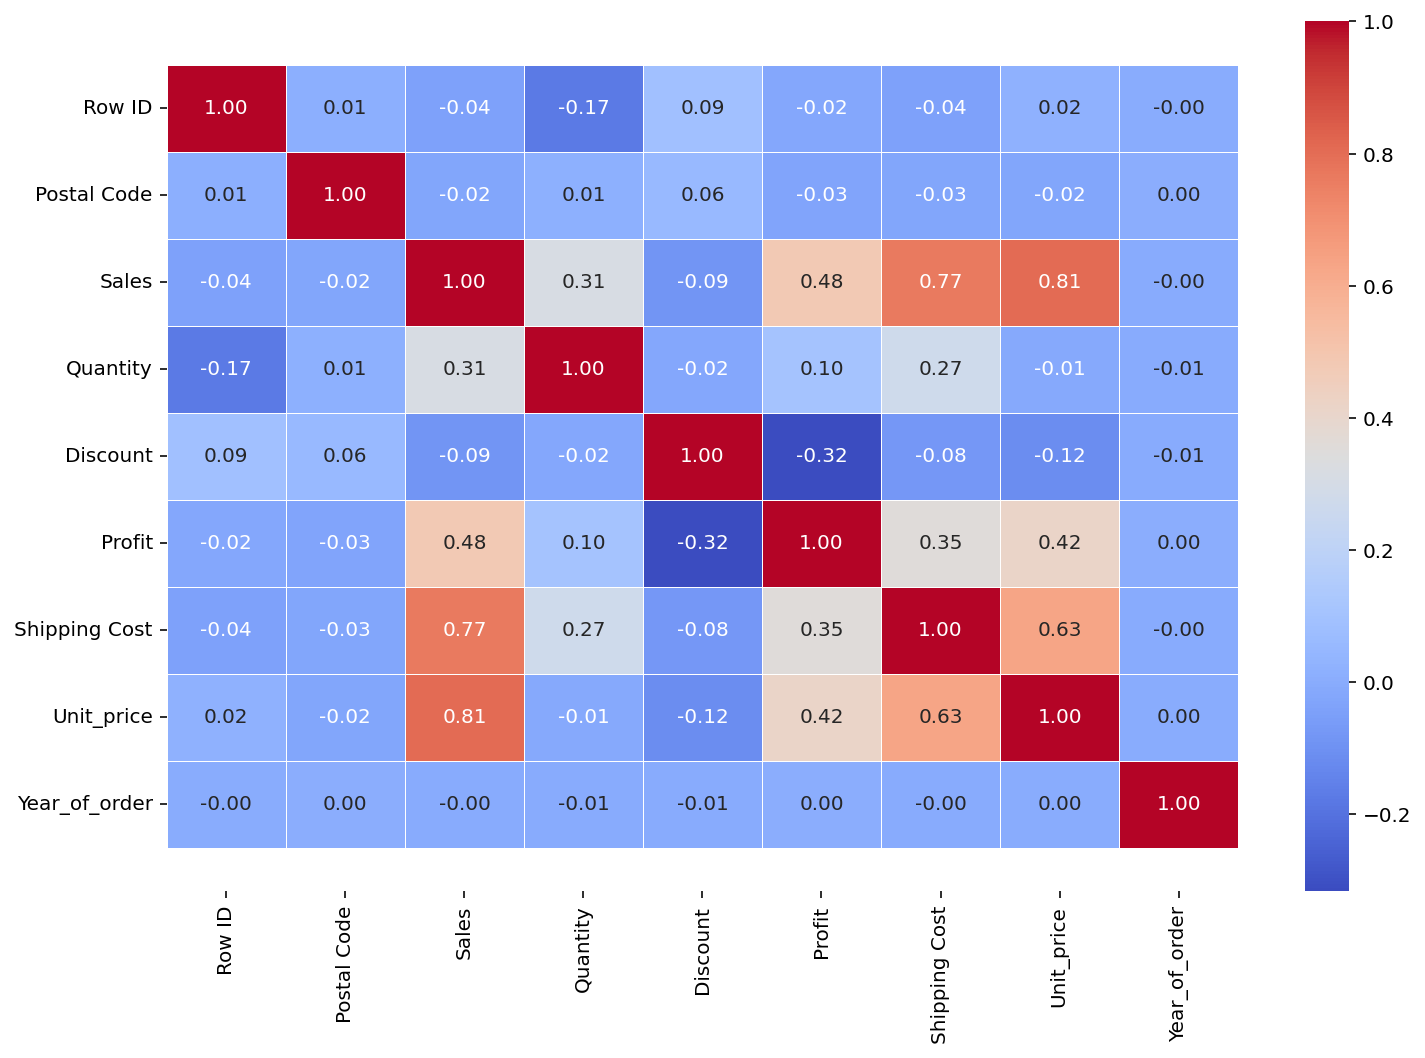

In [27]:
# Visualizing the correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="coolwarm");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### 1. What is the sales and profit per market?

In [28]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [29]:
market_groups = data.groupby("Market")

In [30]:
market_sales_profit= market_groups[["Sales", "Profit"]].sum().sort_values(by="Profit", ascending=True)

market_sales_profit_df = pd.DataFrame(market_sales_profit)

market_sales_profit_df

,Sales,Profit
Market,,
Canada,66928.170,17817.390
EMEA,806161.311,43897.971
Africa,783773.211,88871.631
LATAM,2164605.167,221643.487
US,2297200.860,286397.022
EU,2938089.061,372829.742
APAC,3585744.129,436000.049


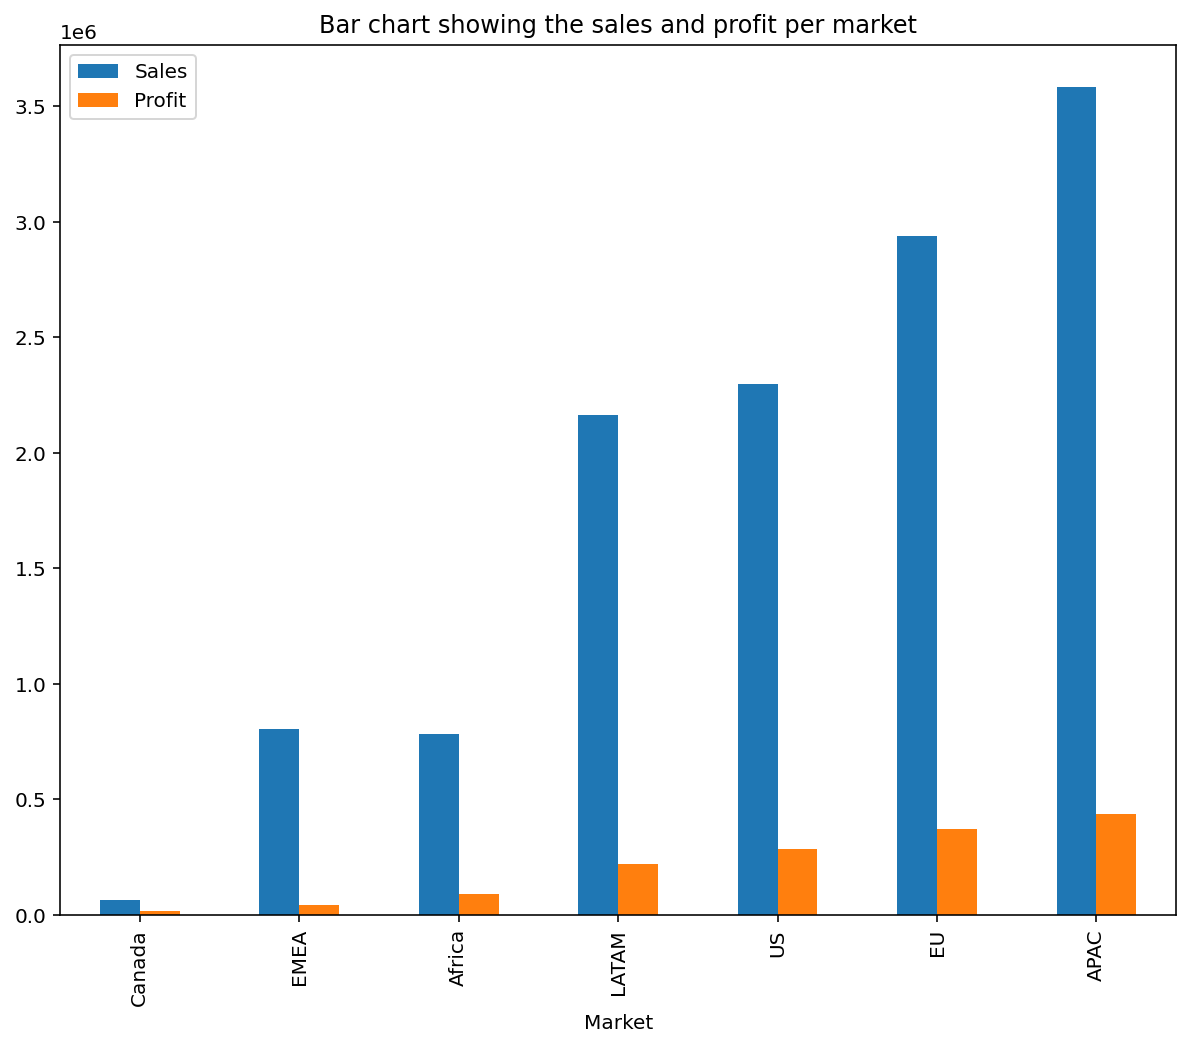

In [31]:
market_sales_profit_df.plot(kind="bar", figsize=(10,8))
plt.title("Bar chart showing the sales and profit per market")
plt.show()

### 2. What is the most and least profitable market?

In [32]:
new_df = market_sales_profit_df.reset_index()

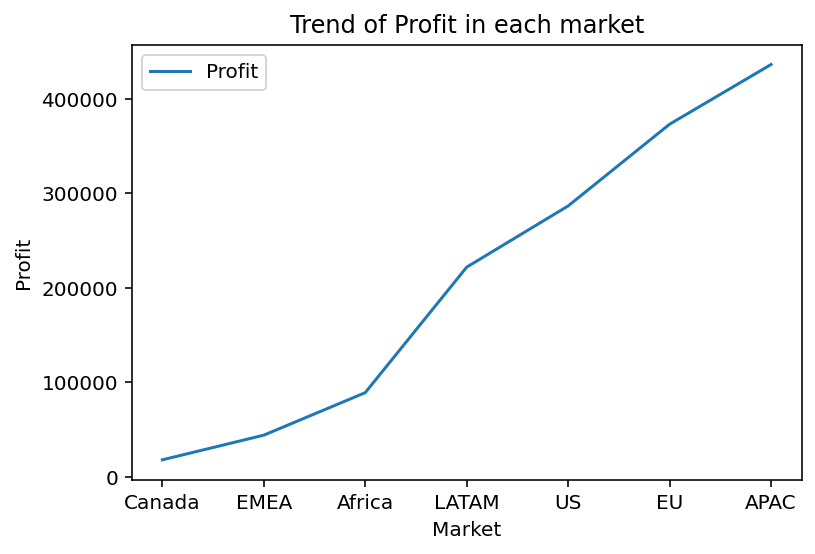

In [33]:
new_df.plot("Market", "Profit")
plt.title("Trend of Profit in each market")
plt.savefig('market_profit.png')
plt.ylabel("Profit");

**`APAC` is the most profitable market while `CANADA` is the least profitable market.**

**- `APAC` sold more `FURNITURE` and `TECHNOLOGY` products**

**- `EU` sold mostly `TECHNOLOGY` products**

**- `US` sold mostly `TECHNOLOGY` products**

**- `LATAM` is the only market that sold mostly `FURNITURE`**

**- `CANADA` sold more of `OFFICE SUPPLIES`.**

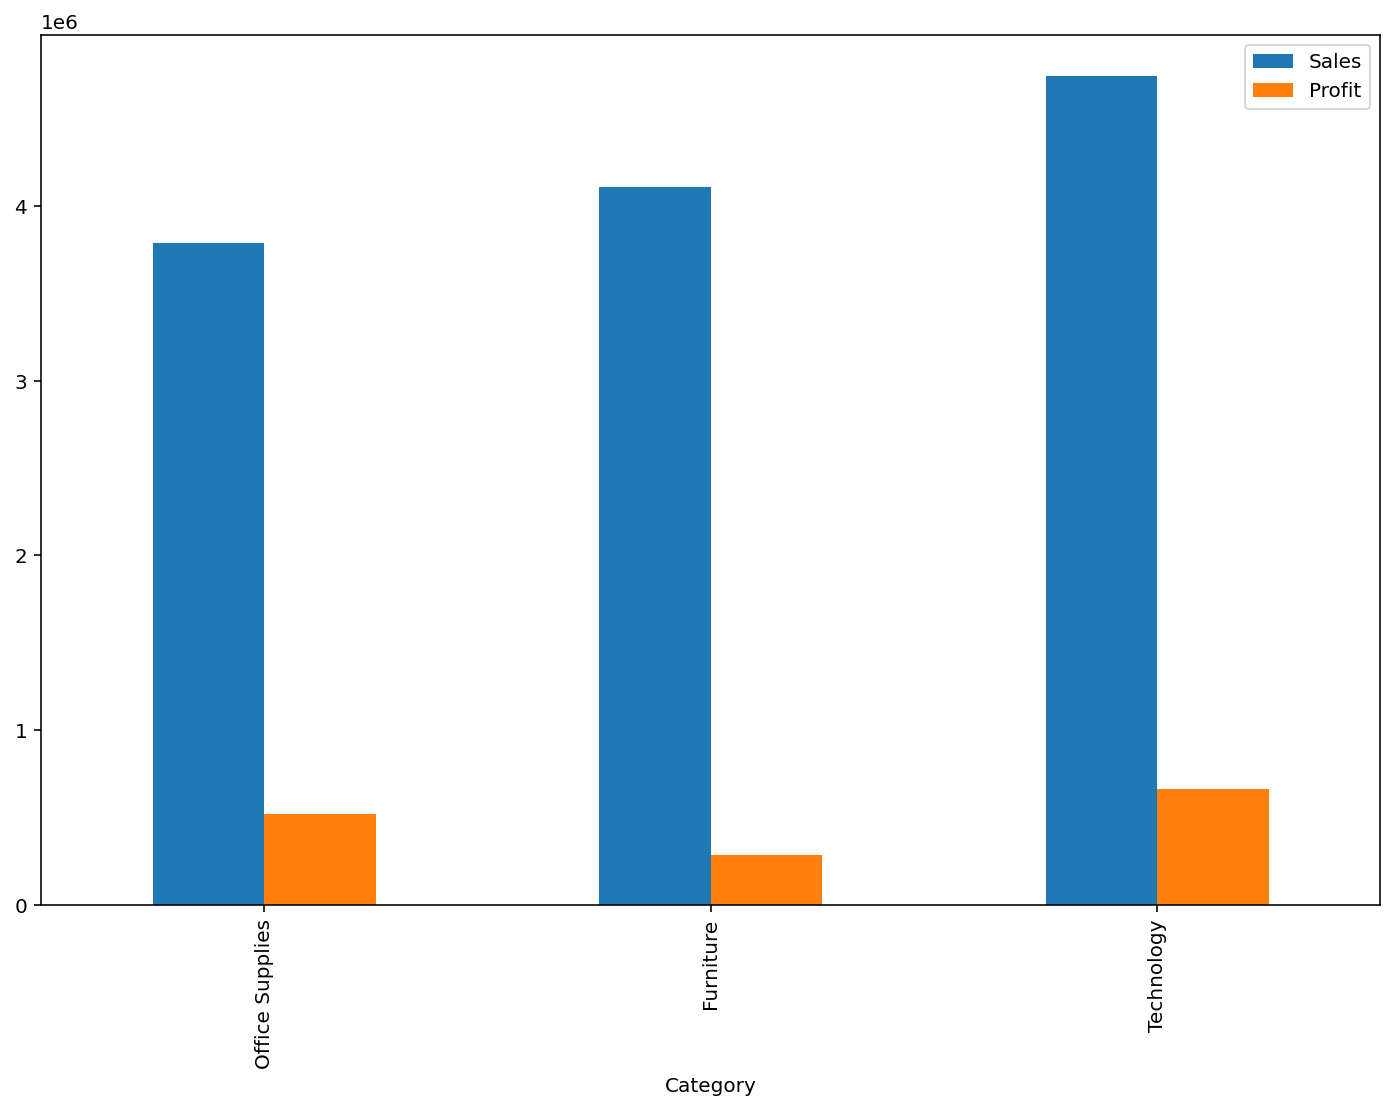

In [34]:
category_group = data.groupby(by = 'Category')[["Sales", "Profit"]].sum()
category_group = category_group.sort_values(by=["Sales"], ascending=True)
category_group.plot(kind="bar", figsize=(12,8))
plt.show()

### 3. How are you going to increase the sales for the products that least bought?

In [35]:
product_groups = data.groupby("Sub-Category")

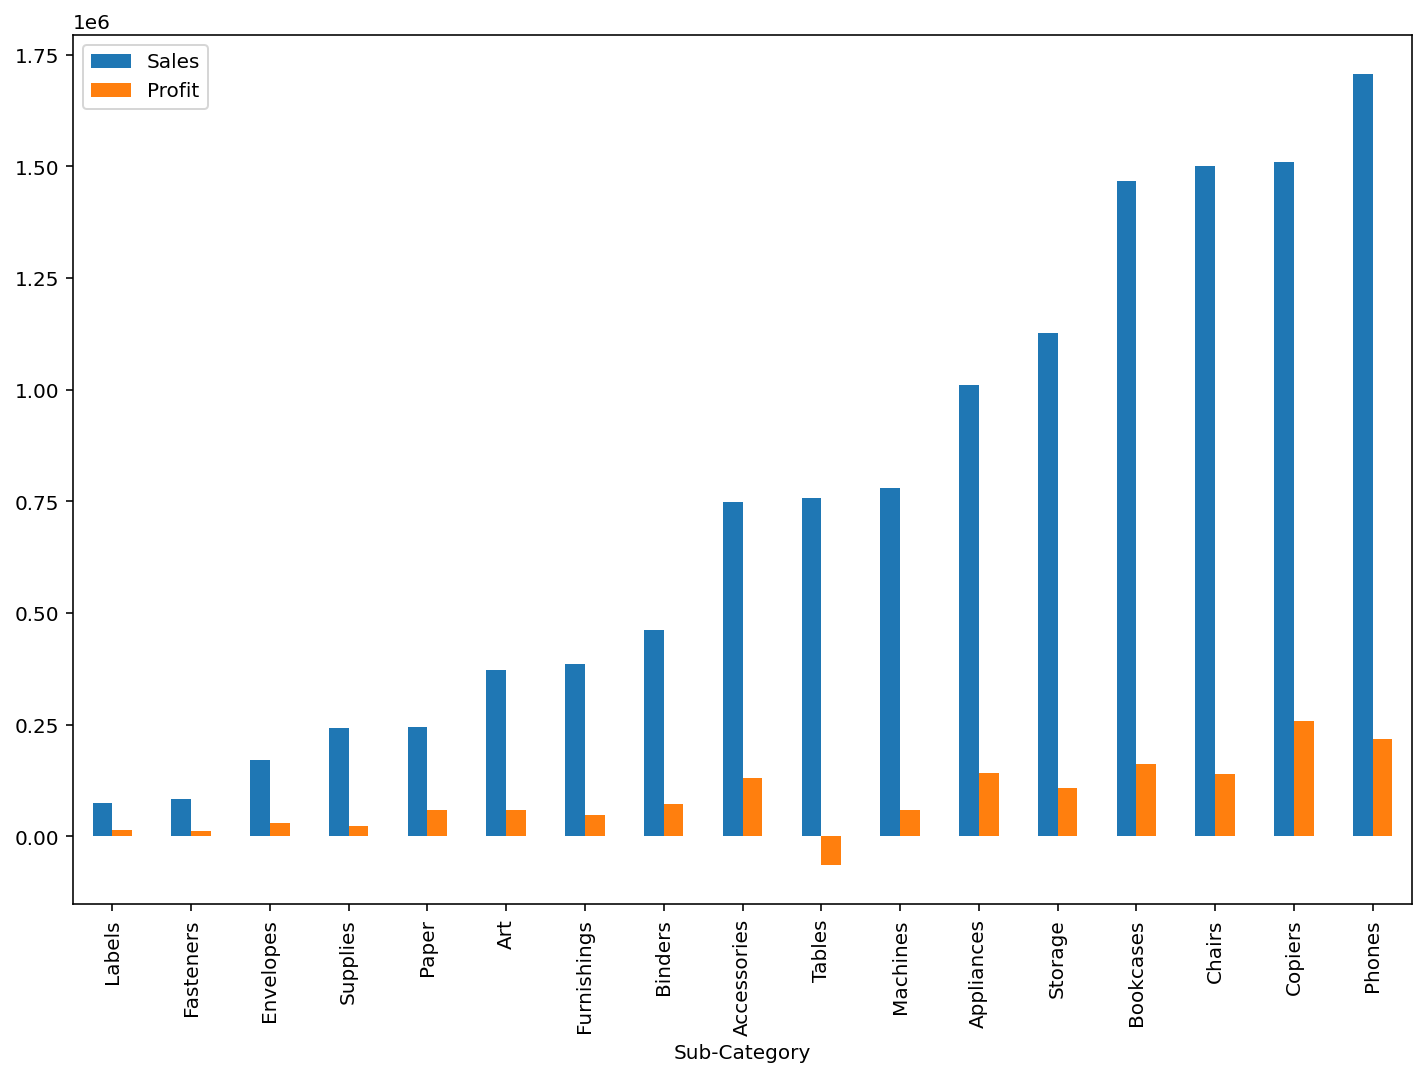

In [36]:
product_sales = product_groups[['Sales', 'Profit']].sum().sort_values(by=["Sales"], ascending=True)

product_sales.plot(kind="bar", figsize=(12,8))

plt.savefig("Product_sales_performance.png")

plt.show();

 There is a lot of loss recorded from the sales of **Tables**

### 4. Which month does the company records more sales?

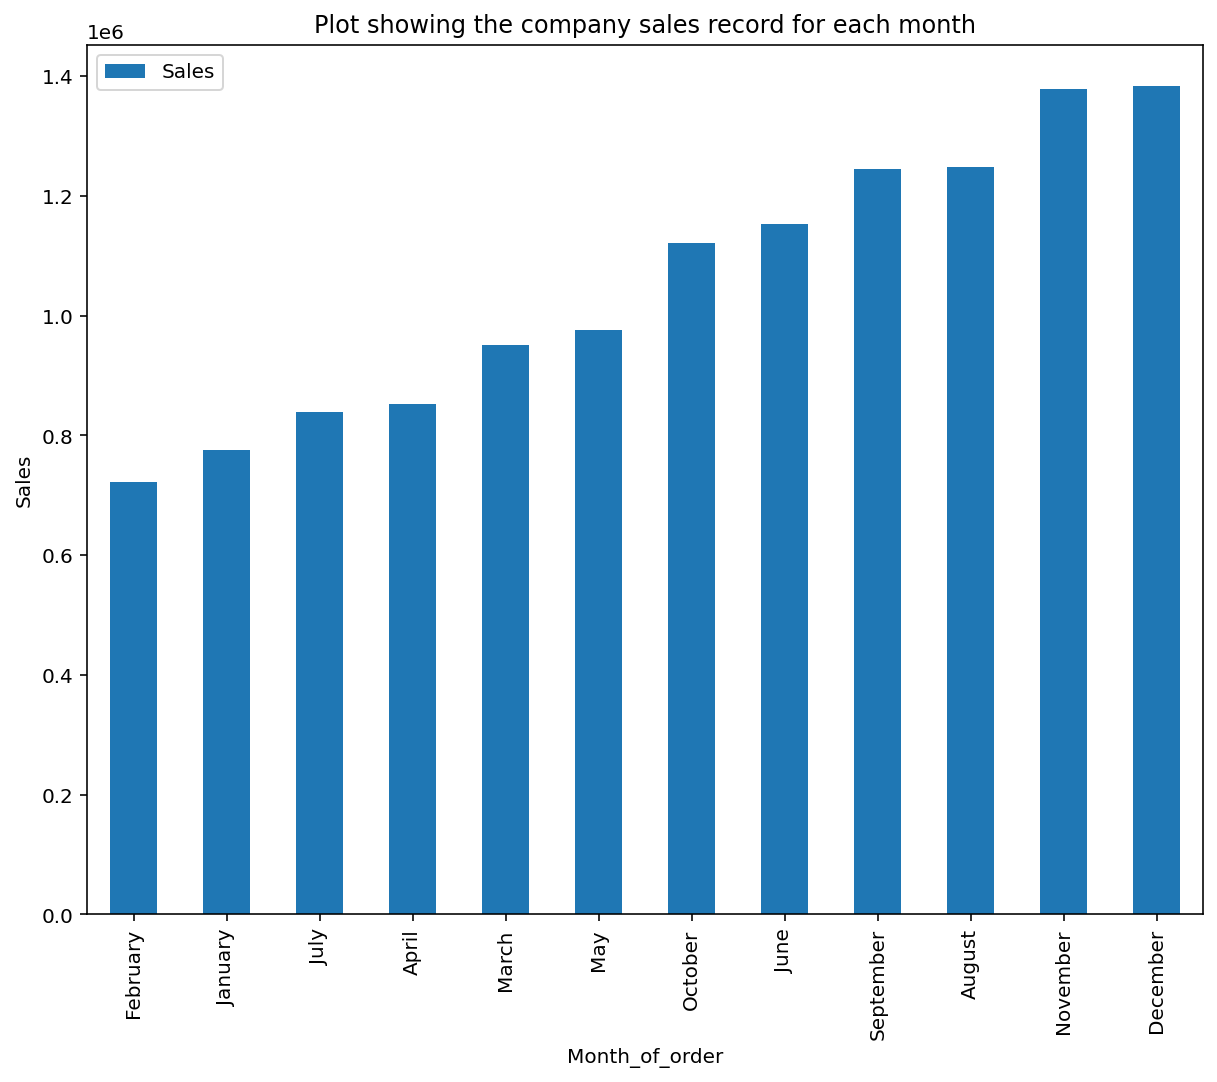

In [37]:
monthly_records = data.groupby('Month_of_order')
monthly_total_sales = monthly_records[['Sales']].sum().sort_values(by='Sales').reset_index()
monthly_records_df = pd.DataFrame(monthly_total_sales)


monthly_records_df.plot(kind='bar',x='Month_of_order',y='Sales', figsize=(10,8))
plt.title("Plot showing the company sales record for each month")
plt.ylabel("Sales")
plt.savefig("Monthly sales record.png")
plt.show();

**More sales were recorded in `November` and `December`**

### 5. What is the correlation between discount and sale?

In [38]:
corr = data['Discount'].corr(data['Sales'])

print("Correlation between discount and sales is: ", round(corr, 2))

Correlation between discount and sales is:  -0.09


**There is a very `weak correlation` between discount and sales**

### 6. Does the shipping cost affect the sales?

In [39]:
corr = data['Shipping Cost'].corr(data['Sales'])
print("Correlation between Shipping Cost and sales is: ", round(corr, 2))

Correlation between Shipping Cost and sales is:  0.77


**We can say that the shipping cost affects sales since the `correlation coefficient is high`**

### 7. What is the dominant product category in each market?

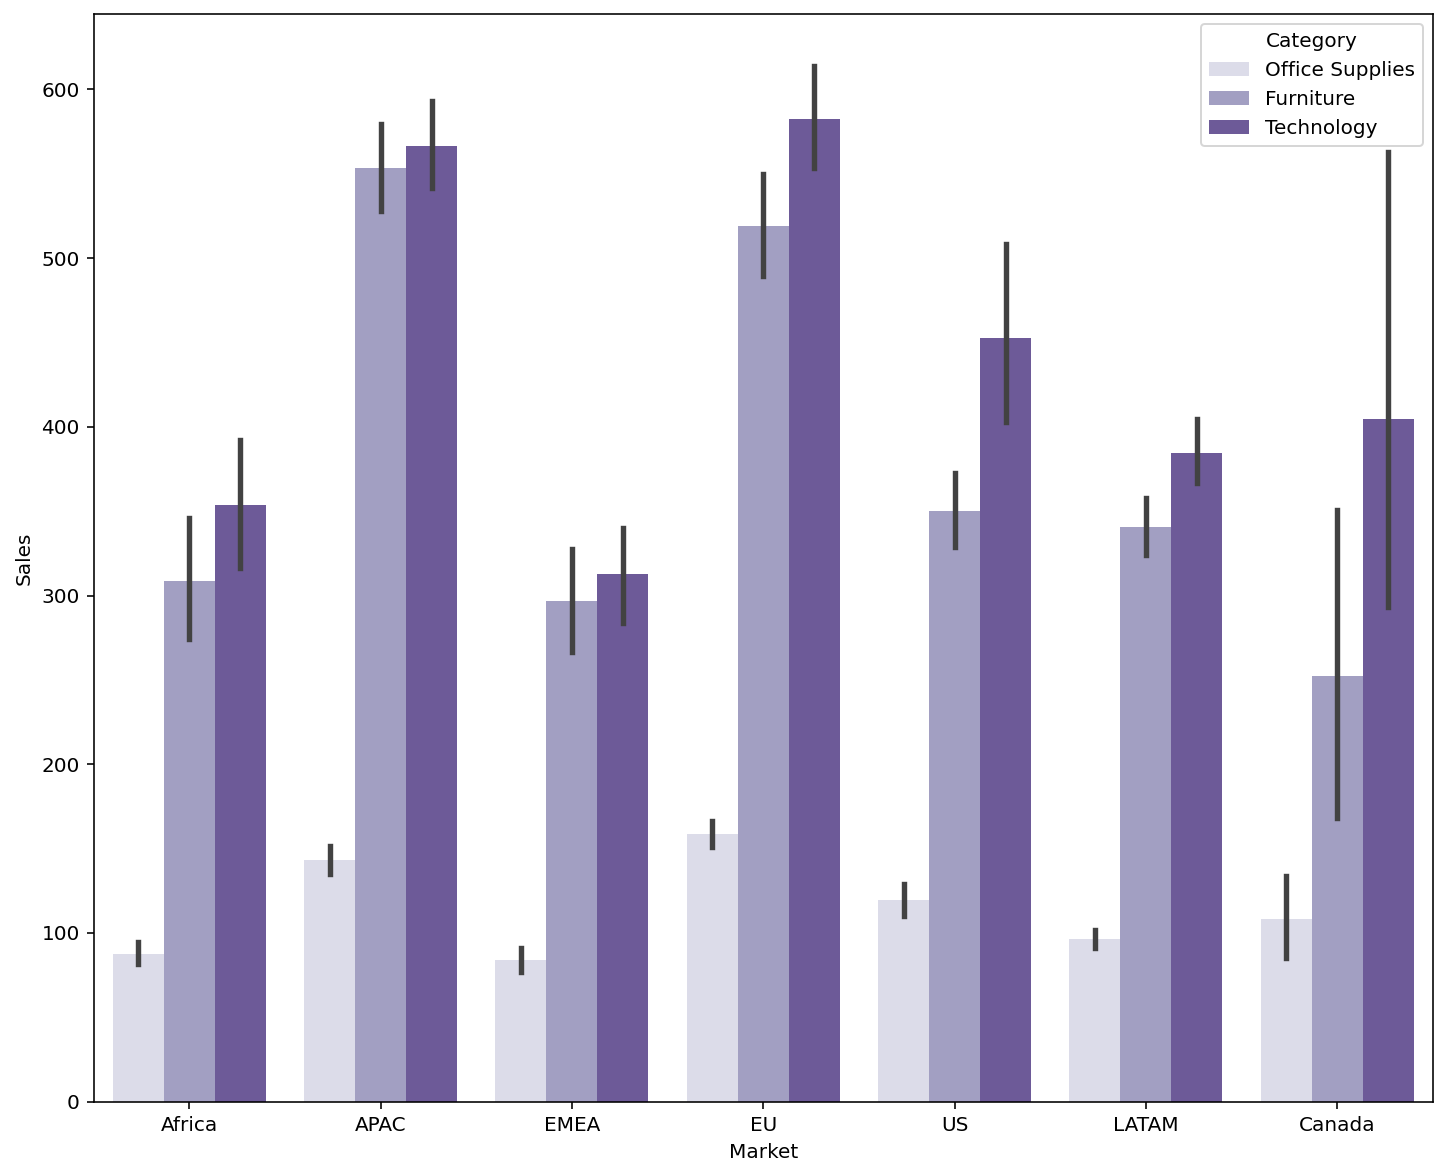

In [40]:
plt.figure(figsize=[12,10])
ax = sns.barplot(x="Market", y="Sales", hue="Category", data=data, palette="Purples")
plt.savefig("product_cat1.png")
plt.show()

**From the graph above, the dominant product category in each market is `Technology`**

### 8. City with most orders for a given product category?

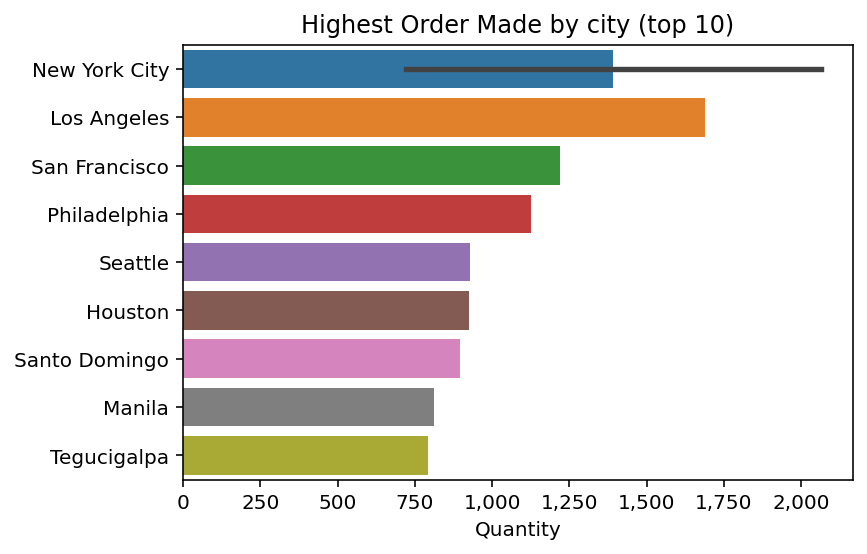

In [41]:
city_records = data.loc[:, ['City', 'Category', 'Quantity']].groupby(['City', 'Category']).sum().reset_index().sort_values(by="Quantity", ascending=False).head(10)

city_r = sns.barplot(x='Quantity', y='City', data=city_records)
city_r.set(xlabel="Quantity", ylabel=None, title='Highest Order Made by city (top 10)')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('city_orders.png')
plt.show()

**`New York` made the highest order with 2 seperate `Categories`**

### 9. which products are making loss?

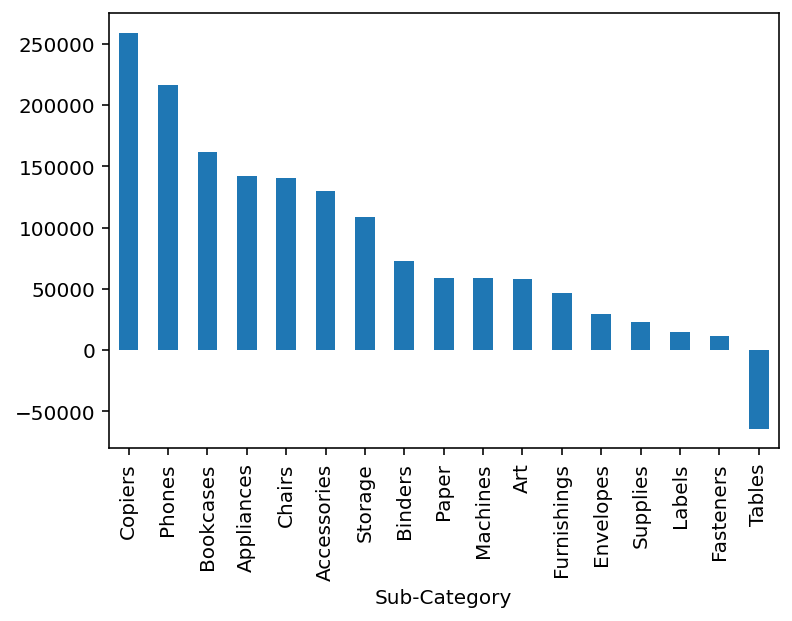

In [42]:
data.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).plot(kind="bar")
plt.show()

**So much loss is recorded from the sales of `Tables`. More findings should be done on the cause**

### 10. Which segment provides more profit?

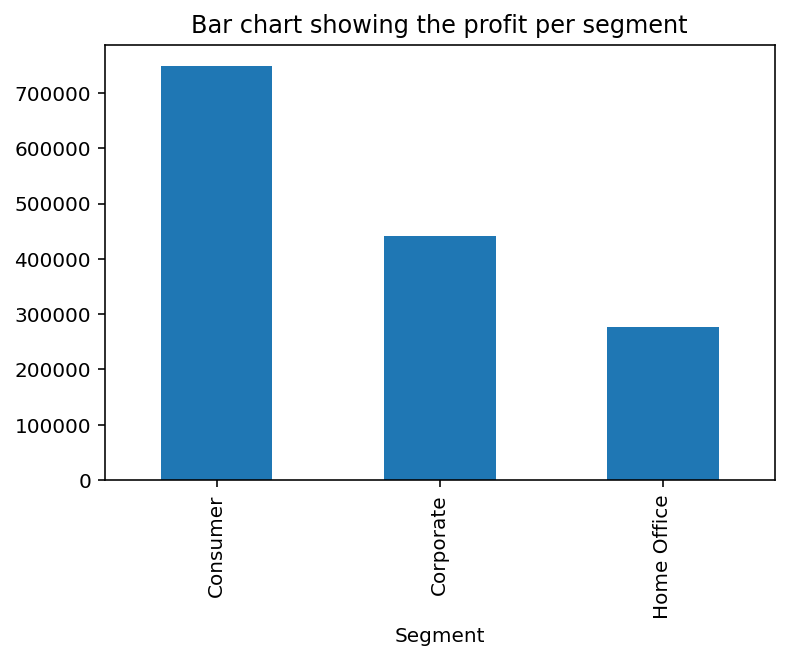

In [43]:
segment_profit = data.groupby("Segment")["Profit"].sum()

# Plotting profit per segment 
segment_profit.plot(kind='bar')

plt.title("Bar chart showing the profit per segment")
plt.xlabel('Segment');

**`Consumer segment` brings in the highest profit**

### 11. What is the correlation between quantity and profit?

In [44]:
corr = data['Quantity'].corr(data['Profit'])

print("Correlation between Quantity and Profit is {}".format(round(corr, 2)))

Correlation between Quantity and Profit is 0.1


### 12. what it the correlation between shipping cost and profit?

In [45]:
corr = data['Shipping Cost'].corr(data['Profit'])
print("Correlation between Shipping Cost and Profit is: ", round(corr, 2))

Correlation between Shipping Cost and Profit is:  0.35


### 13. Which order priority yields more sales?

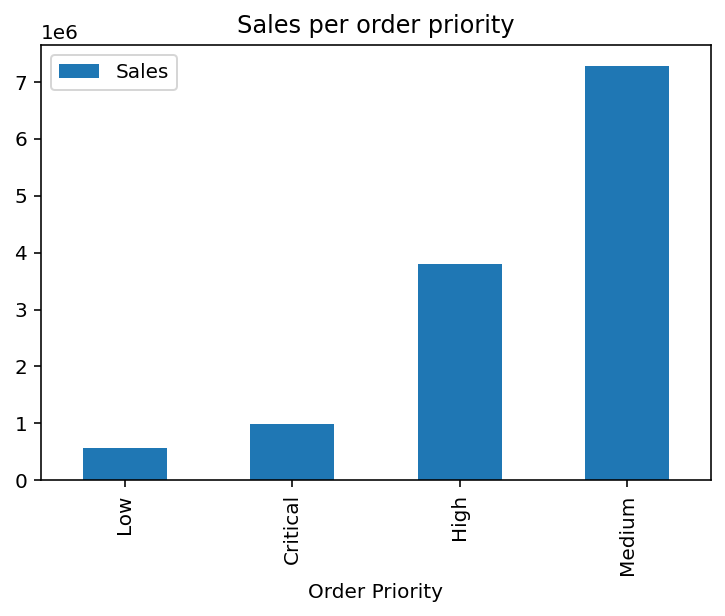

In [46]:
order_priority = data.groupby("Order Priority")

order_priority_df = pd.DataFrame(order_priority["Sales"].sum().sort_values(ascending=True))

order_priority_df.plot(kind="bar")

plt.title("Sales per order priority")

plt.show();

**`Low` yields the lowest Sales**

### 14. What is the average shipping cost to each region?

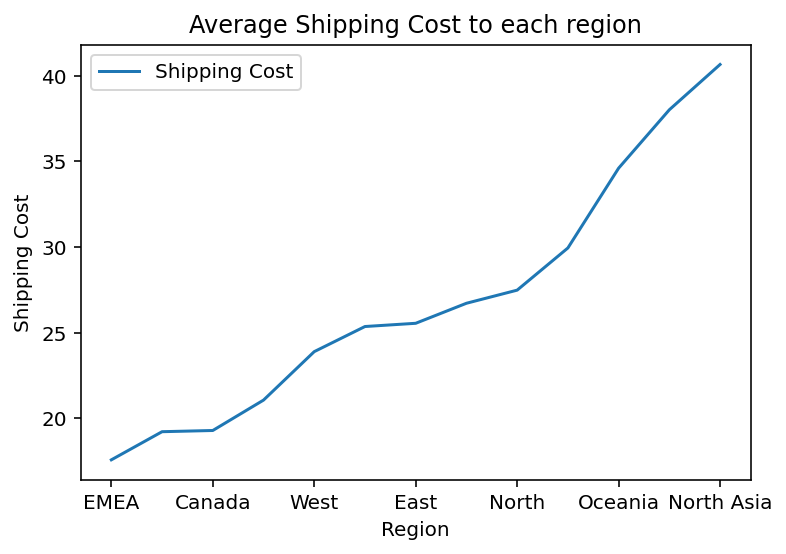

In [47]:
cost_per_region = data.groupby("Region")["Shipping Cost"].mean().sort_values(ascending = True)

cost_per_region_df = pd.DataFrame(cost_per_region).reset_index()

cost_per_region_df.plot.line("Region", "Shipping Cost")

plt.ylabel("Shipping Cost")
plt.title('Average Shipping Cost to each region')
plt.show();

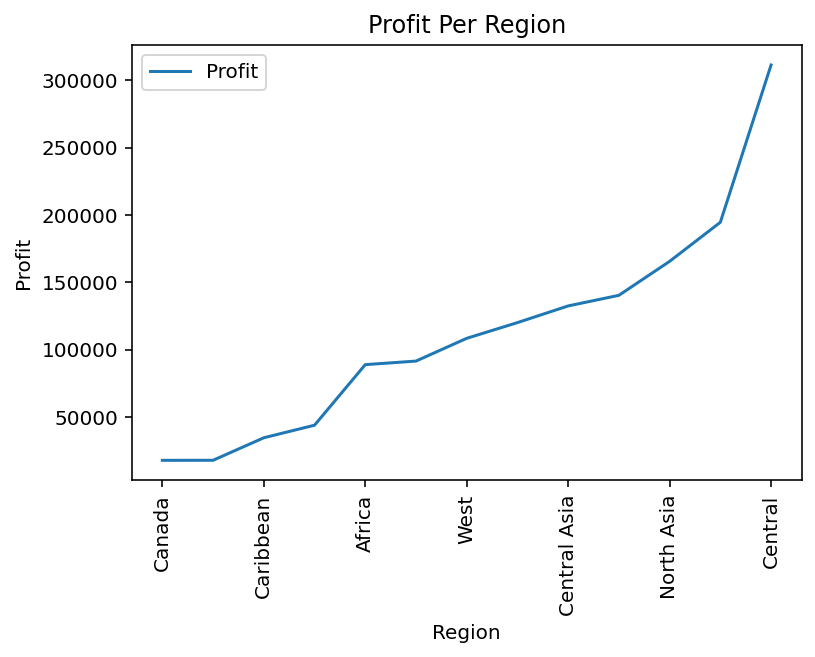

In [48]:
profit_per_region = data.groupby("Region")["Profit"].sum().sort_values(ascending = True)

profit_per_region_df = pd.DataFrame(profit_per_region).reset_index()

profit_per_region_df.plot.line("Region", "Profit")

plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.title('Profit Per Region')
plt.show();

**`Central` Region made the highest profit while `Canada` made the least**

### 15. What product categories should be targetted to the different markets?

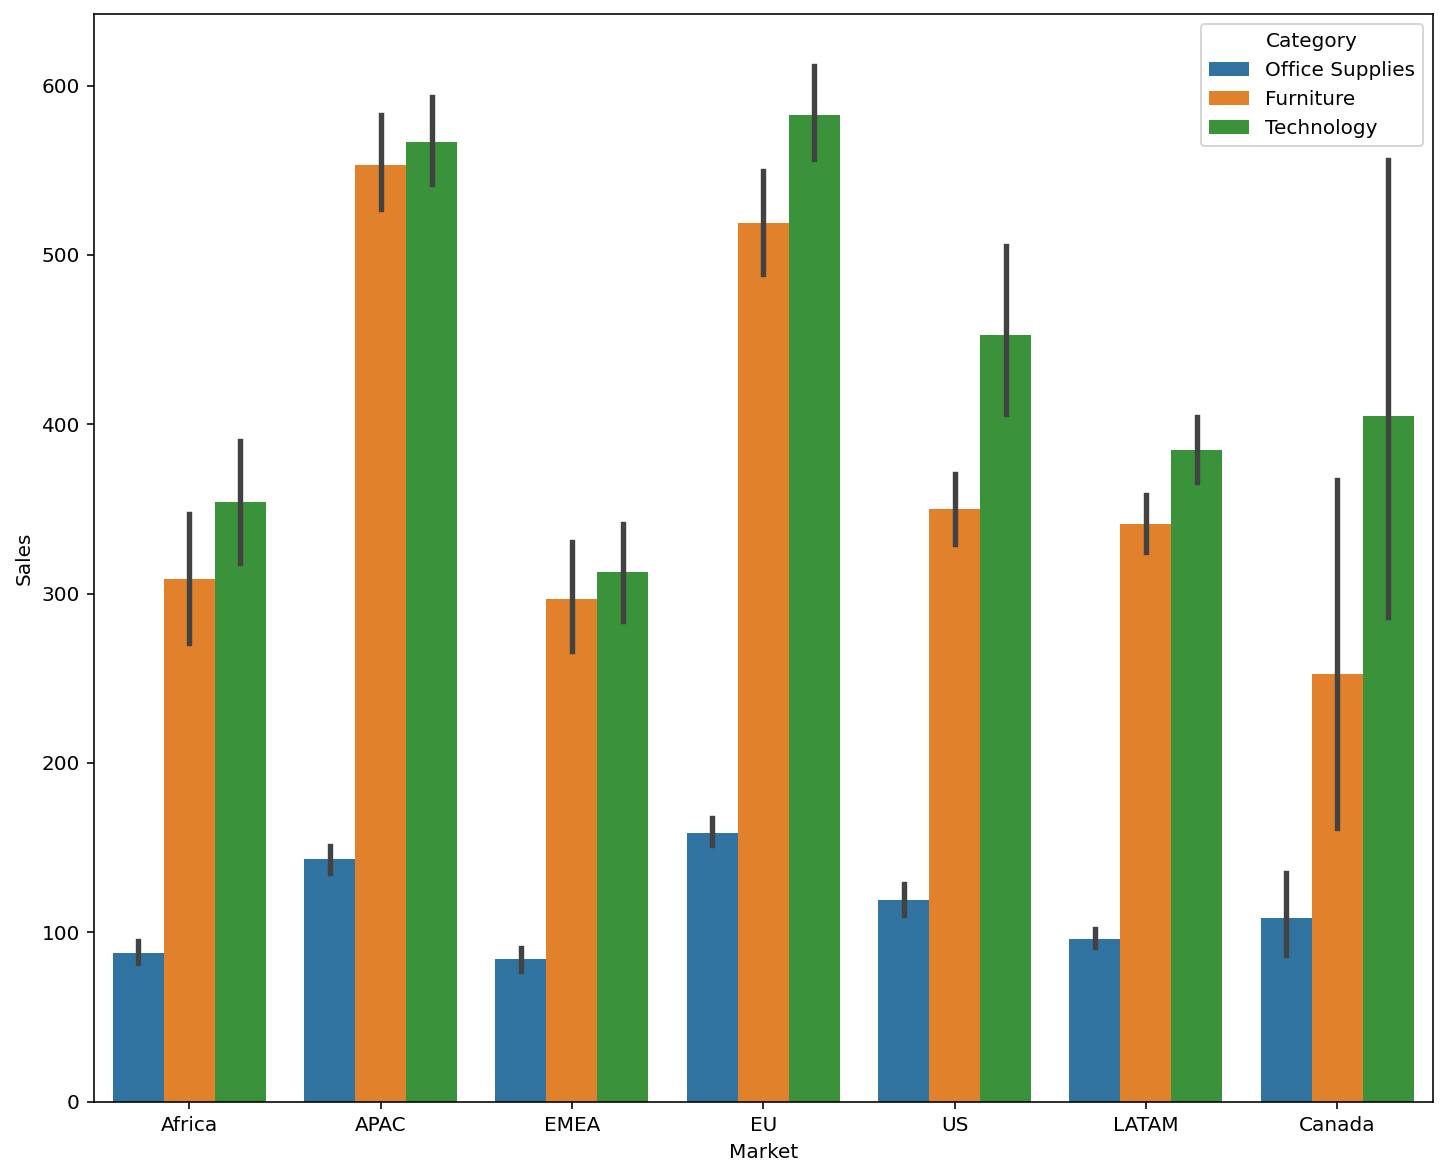

In [49]:
plt.figure(figsize=[12,10])
ax = sns.barplot(x="Market", y="Sales", hue="Category", data=data)
plt.show()

**`Technology` happens to be the best-selling products so far in all `Market Region`. We need to find out why `Office Supplies` generate the lowest Sales across the `Market`**

### -  What product category sells best and what product category sells low in each Market?

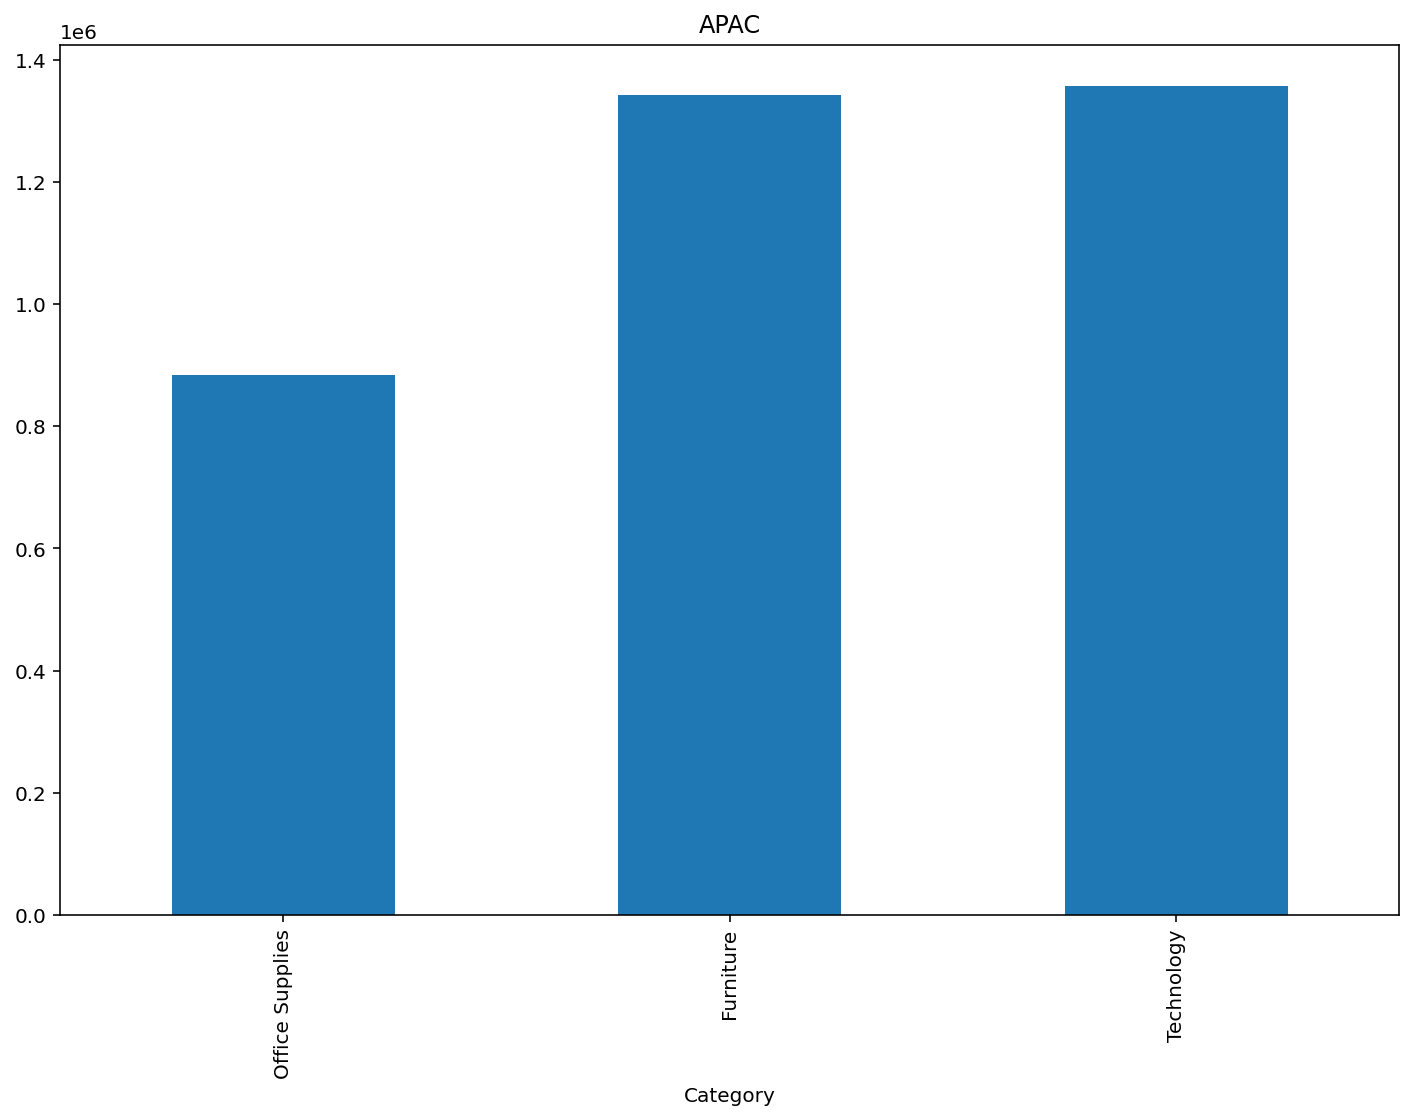

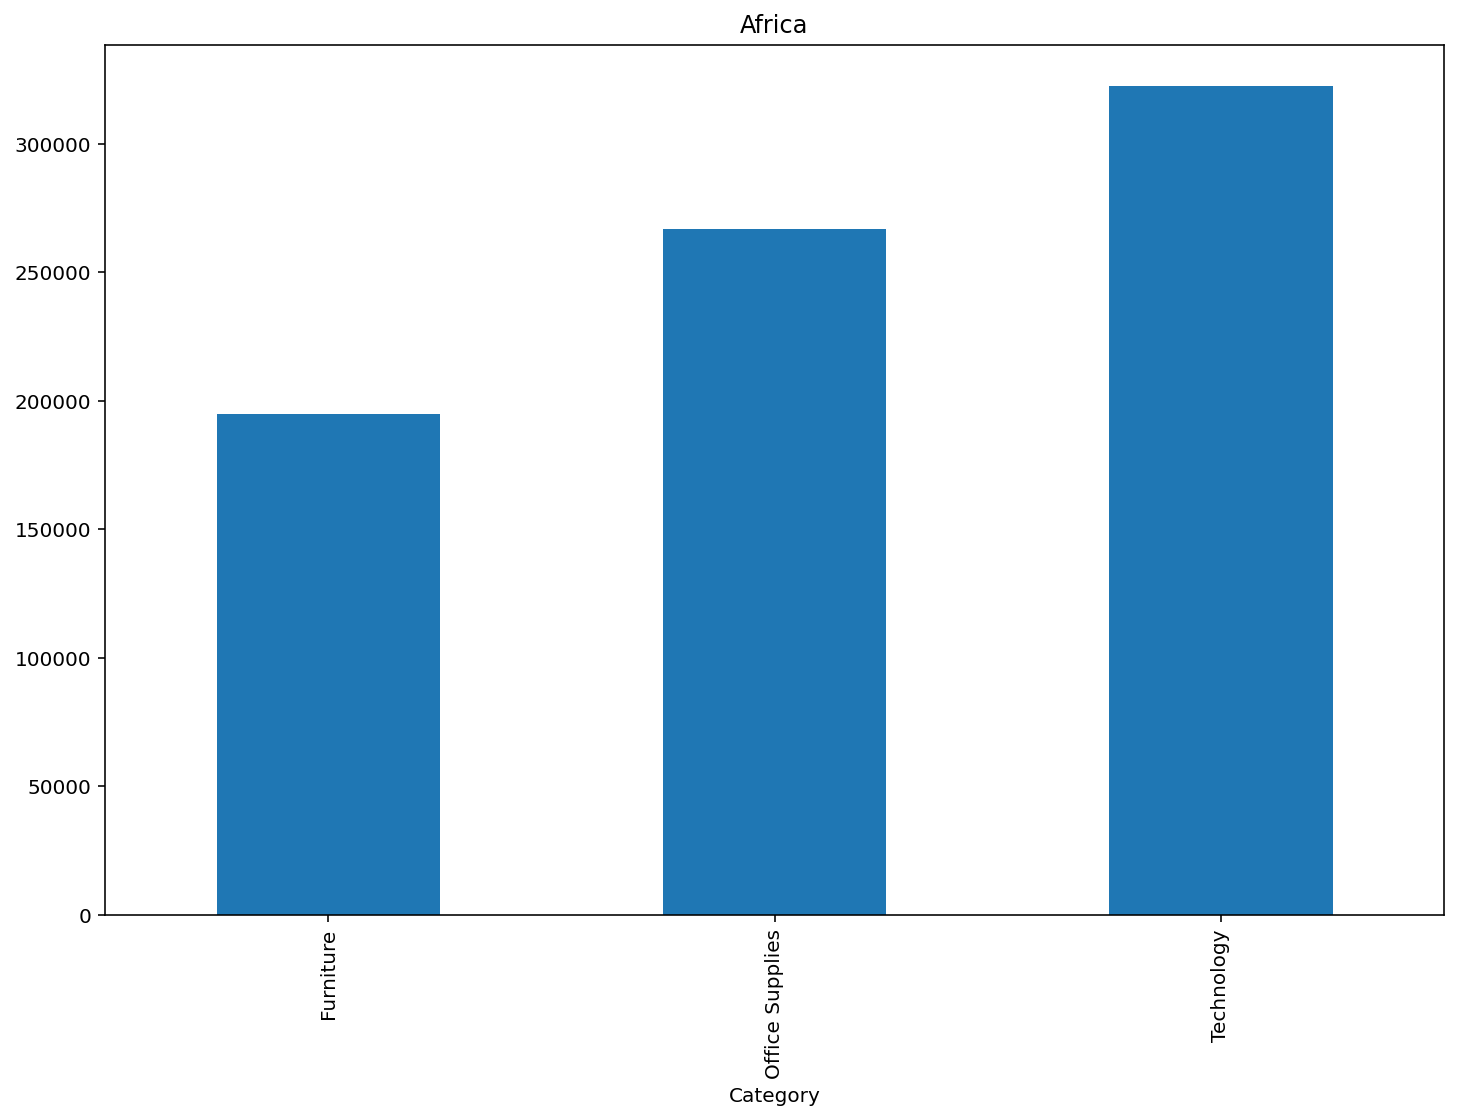

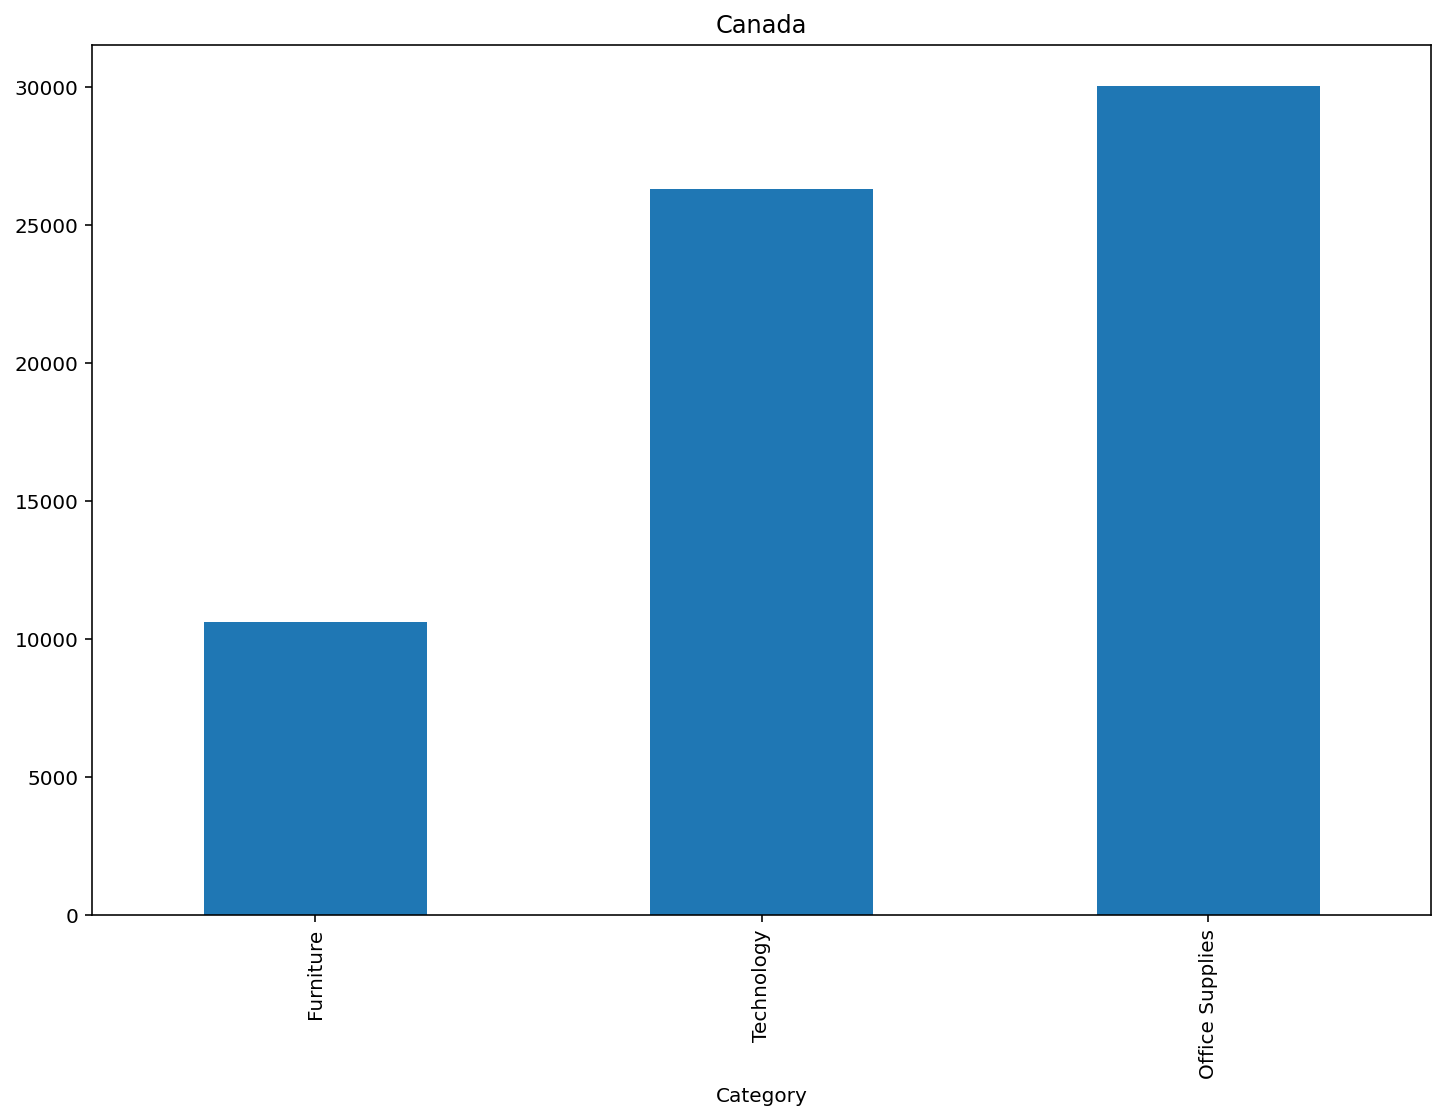

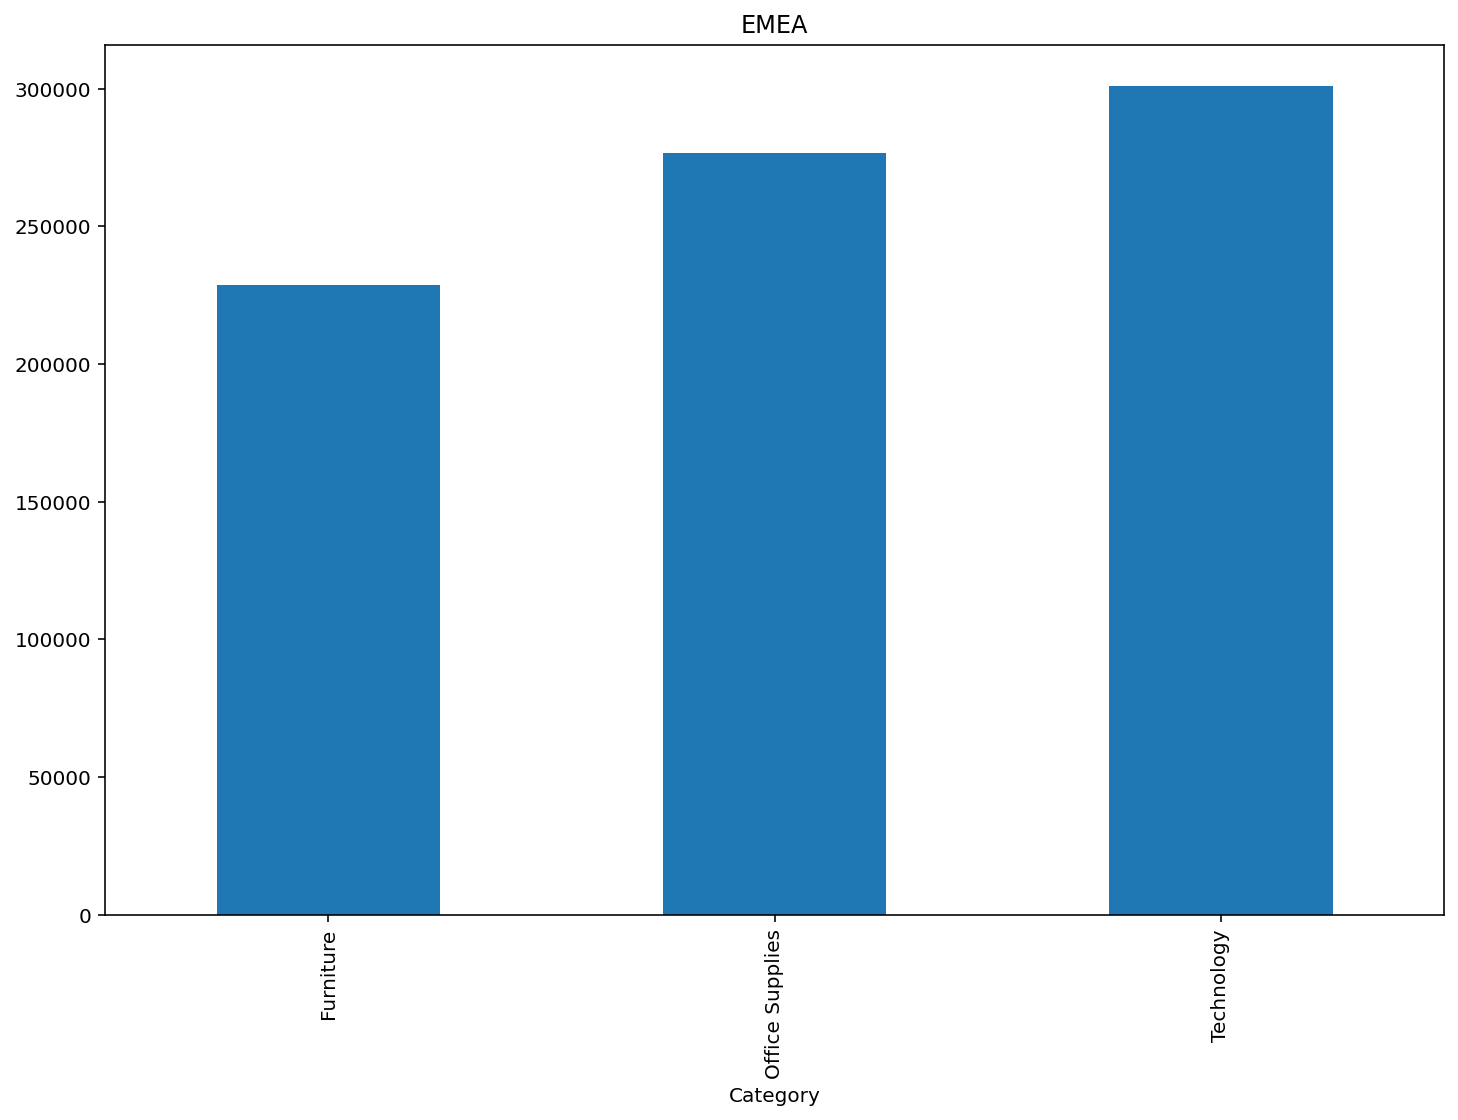

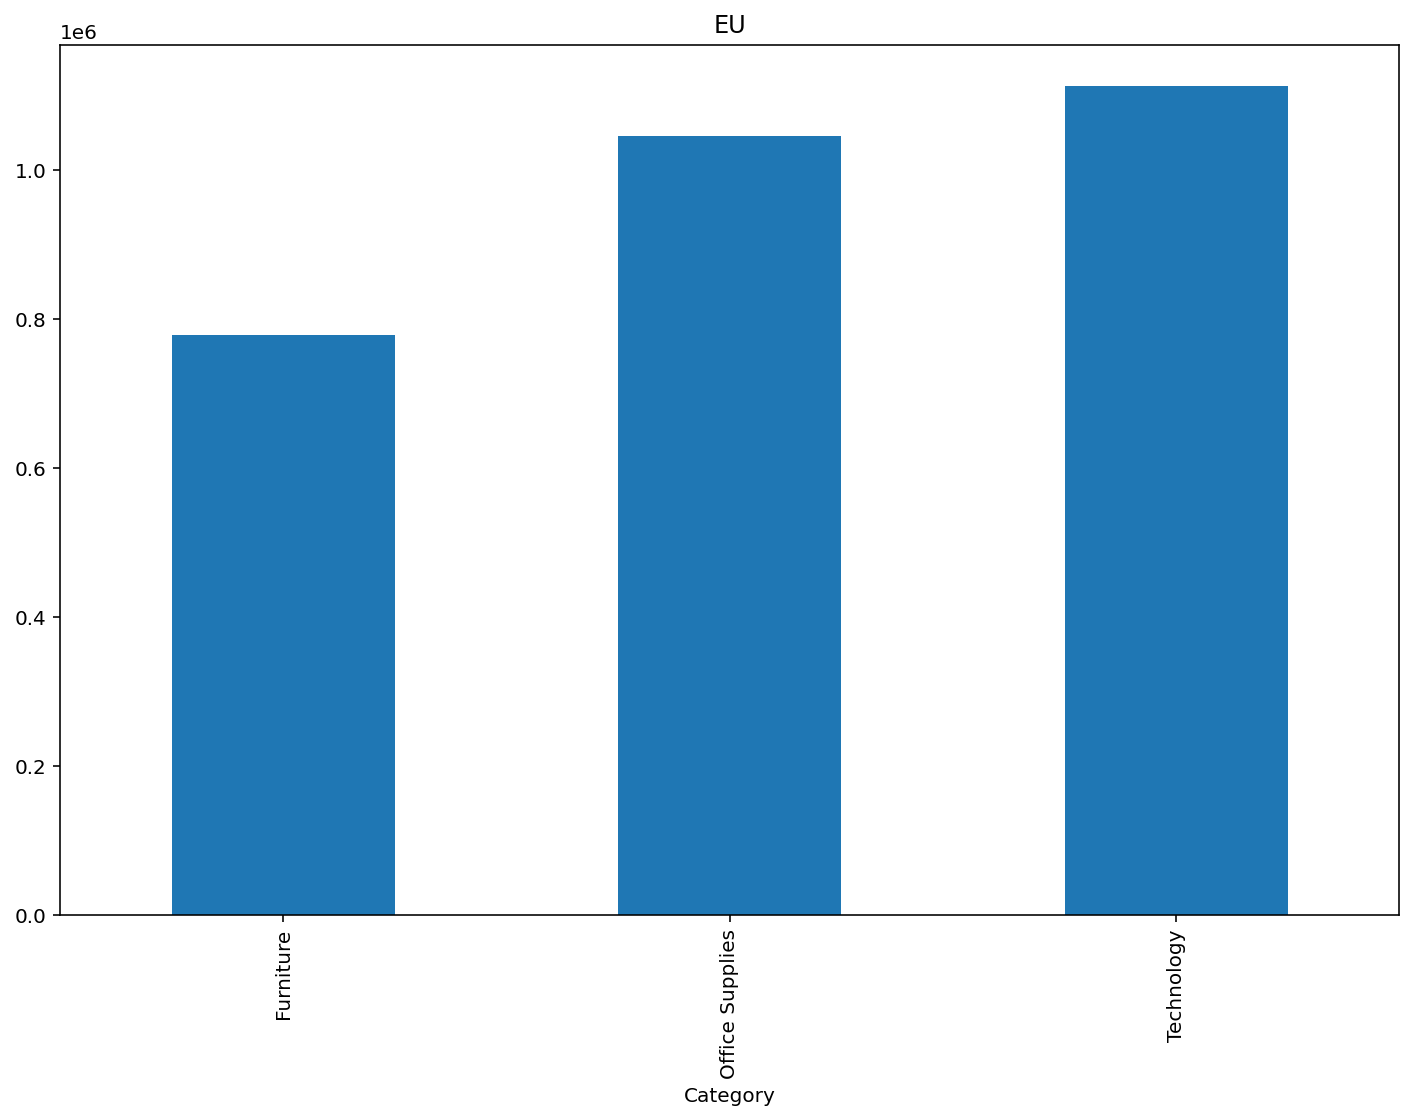

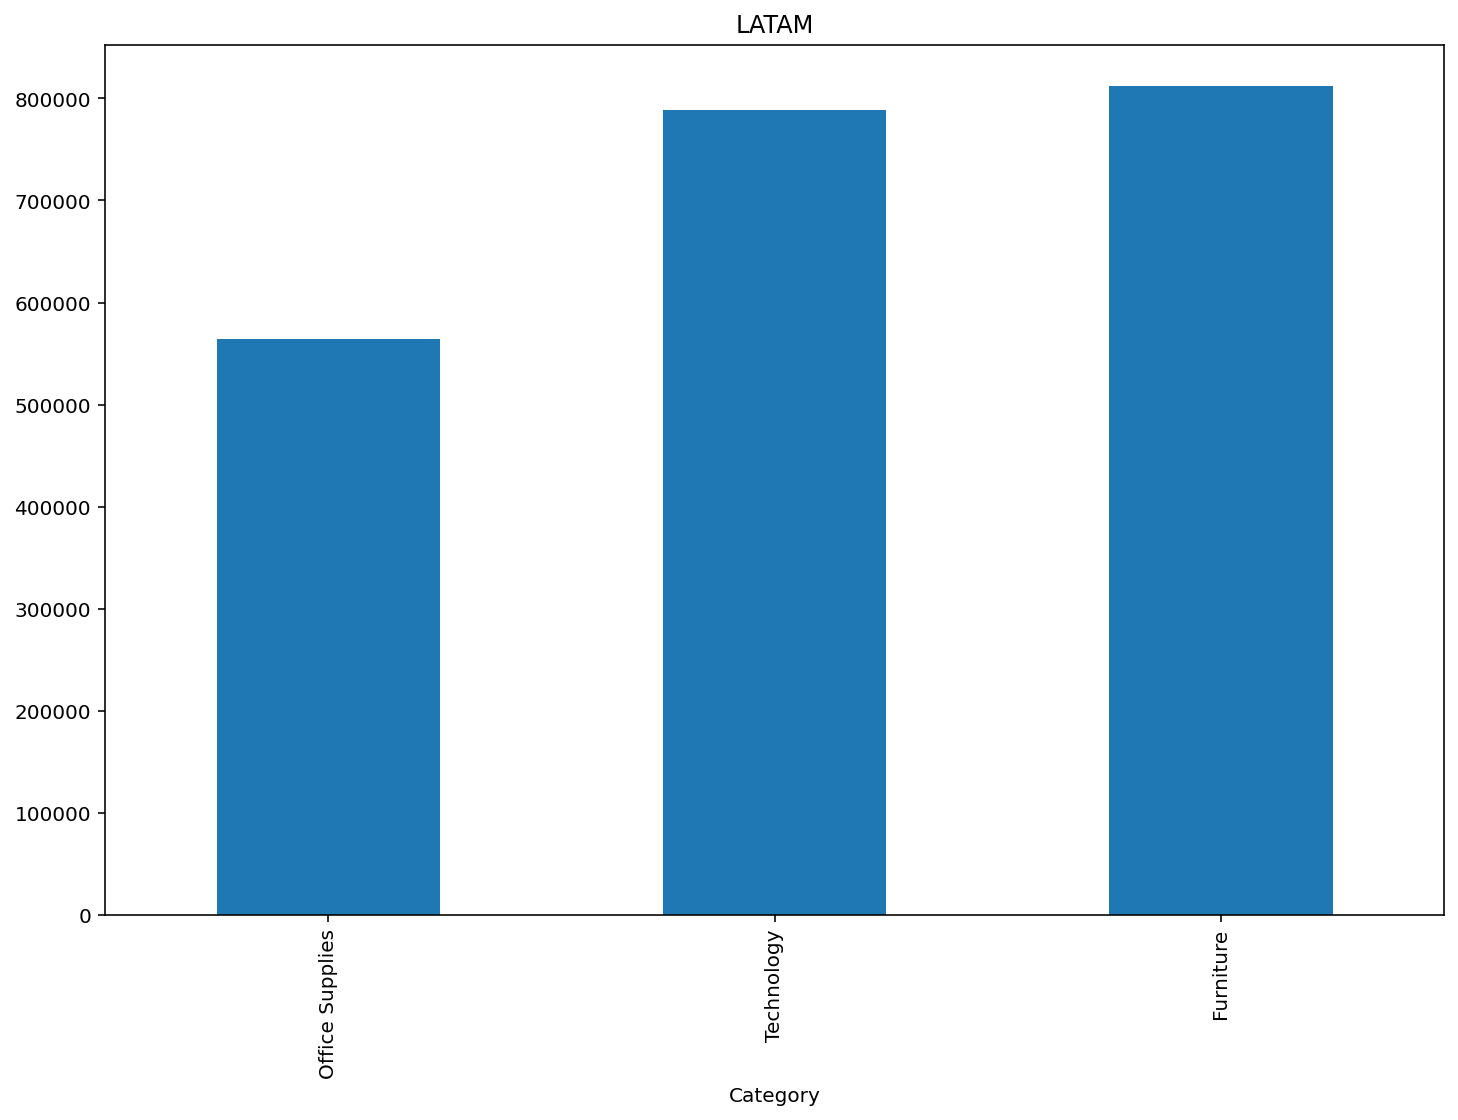

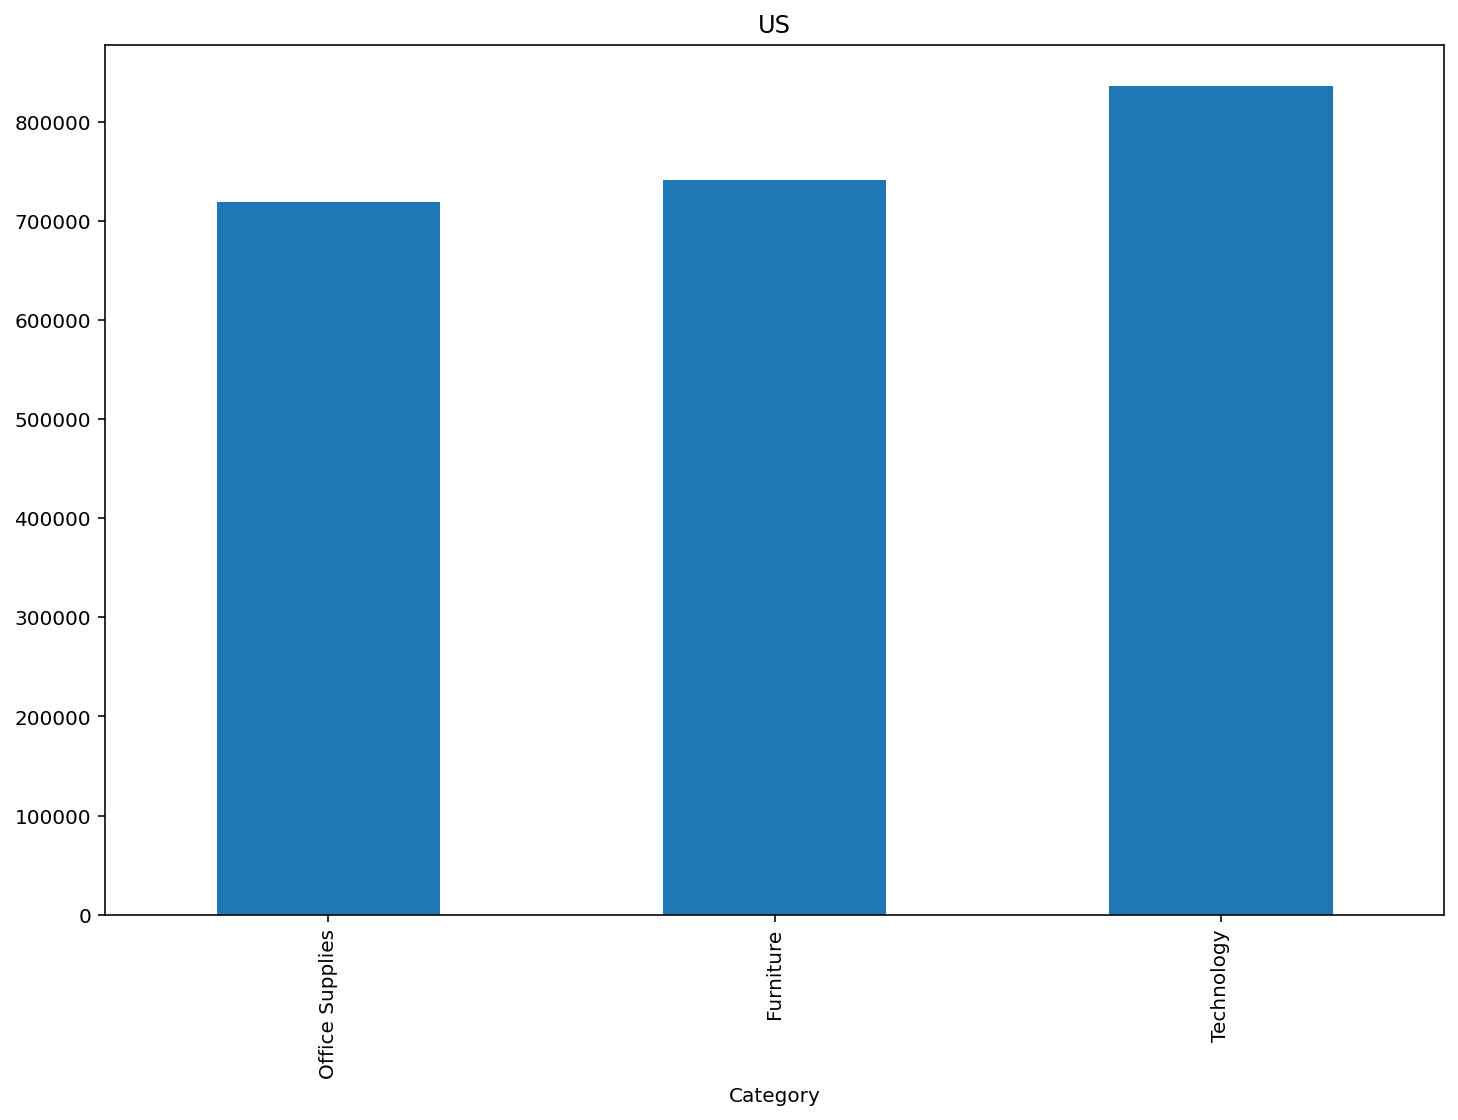

In [50]:

for city,city_data in market_groups:
    category_group = city_data.groupby(by = 'Category')["Sales"].sum()
    category_group = category_group.sort_values(ascending=True)
    category_group.plot(kind="bar", figsize=(12,8))
    plt.title(city)
    plt.show()






### The trend of sales for each year

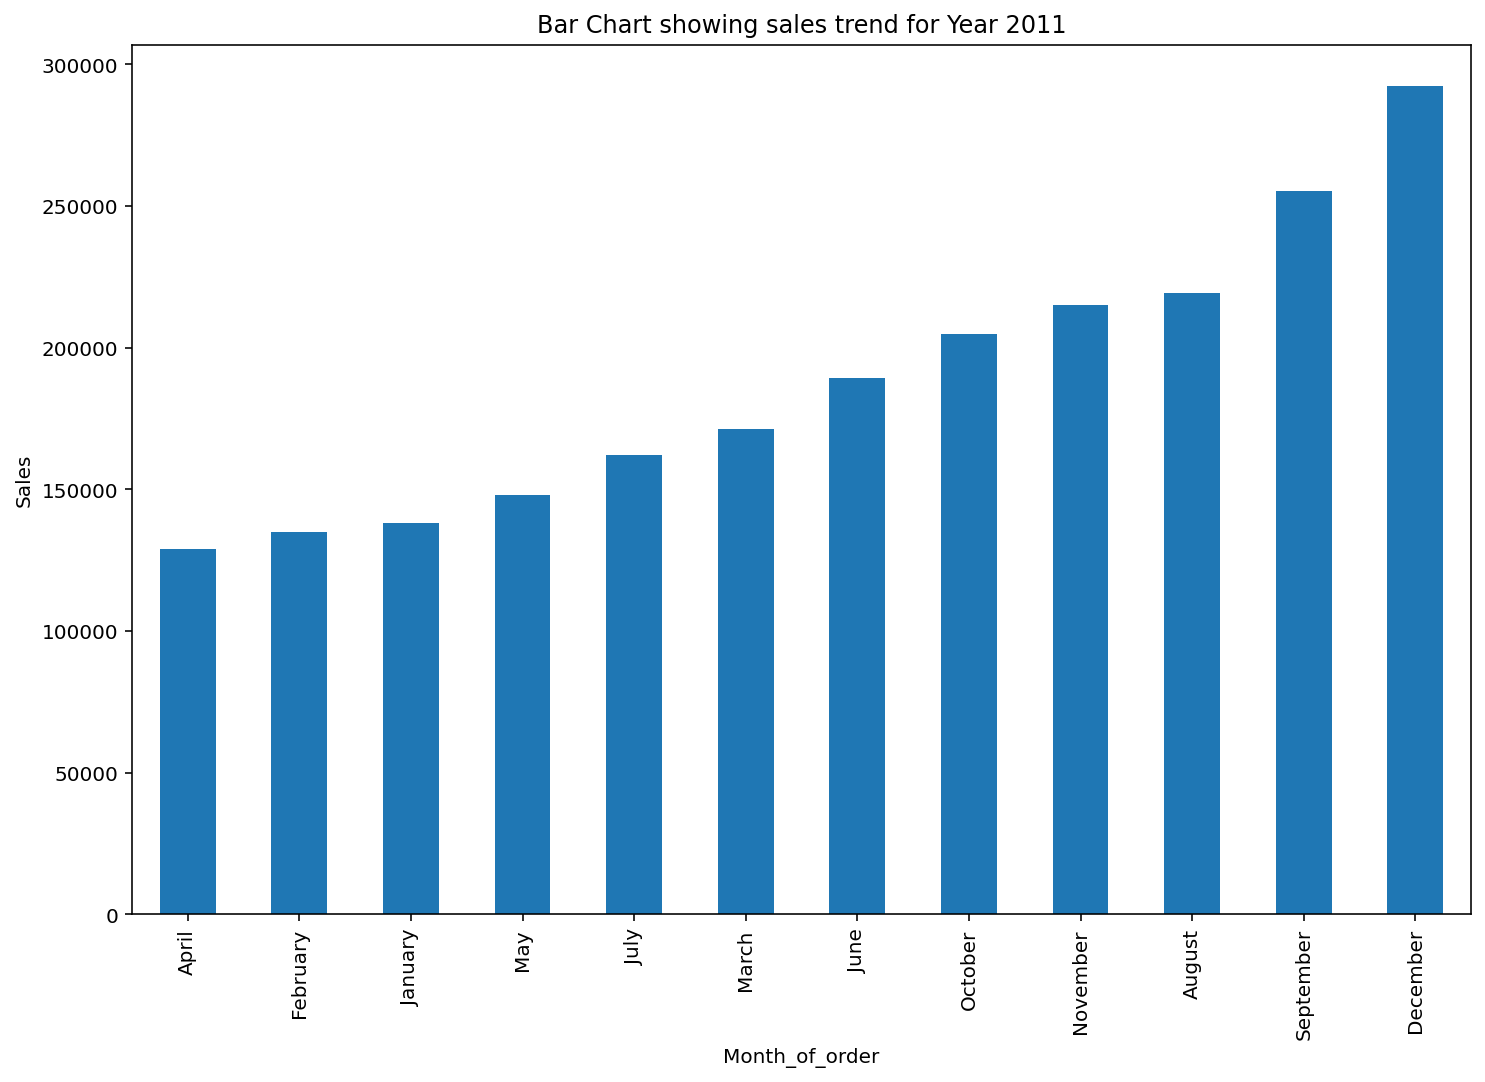

In [51]:
year_11 = data[data["Year_of_order"] == 2011]
year_11_sales = year_11.groupby('Month_of_order')["Sales"].sum().sort_values(ascending=True)
year_11_sales.plot(kind='bar', figsize=(12,8))
plt.ylabel("Sales")
plt.title("Bar Chart showing sales trend for Year 2011")
plt.show();

**`December` had the highest sales recorded in 2011**

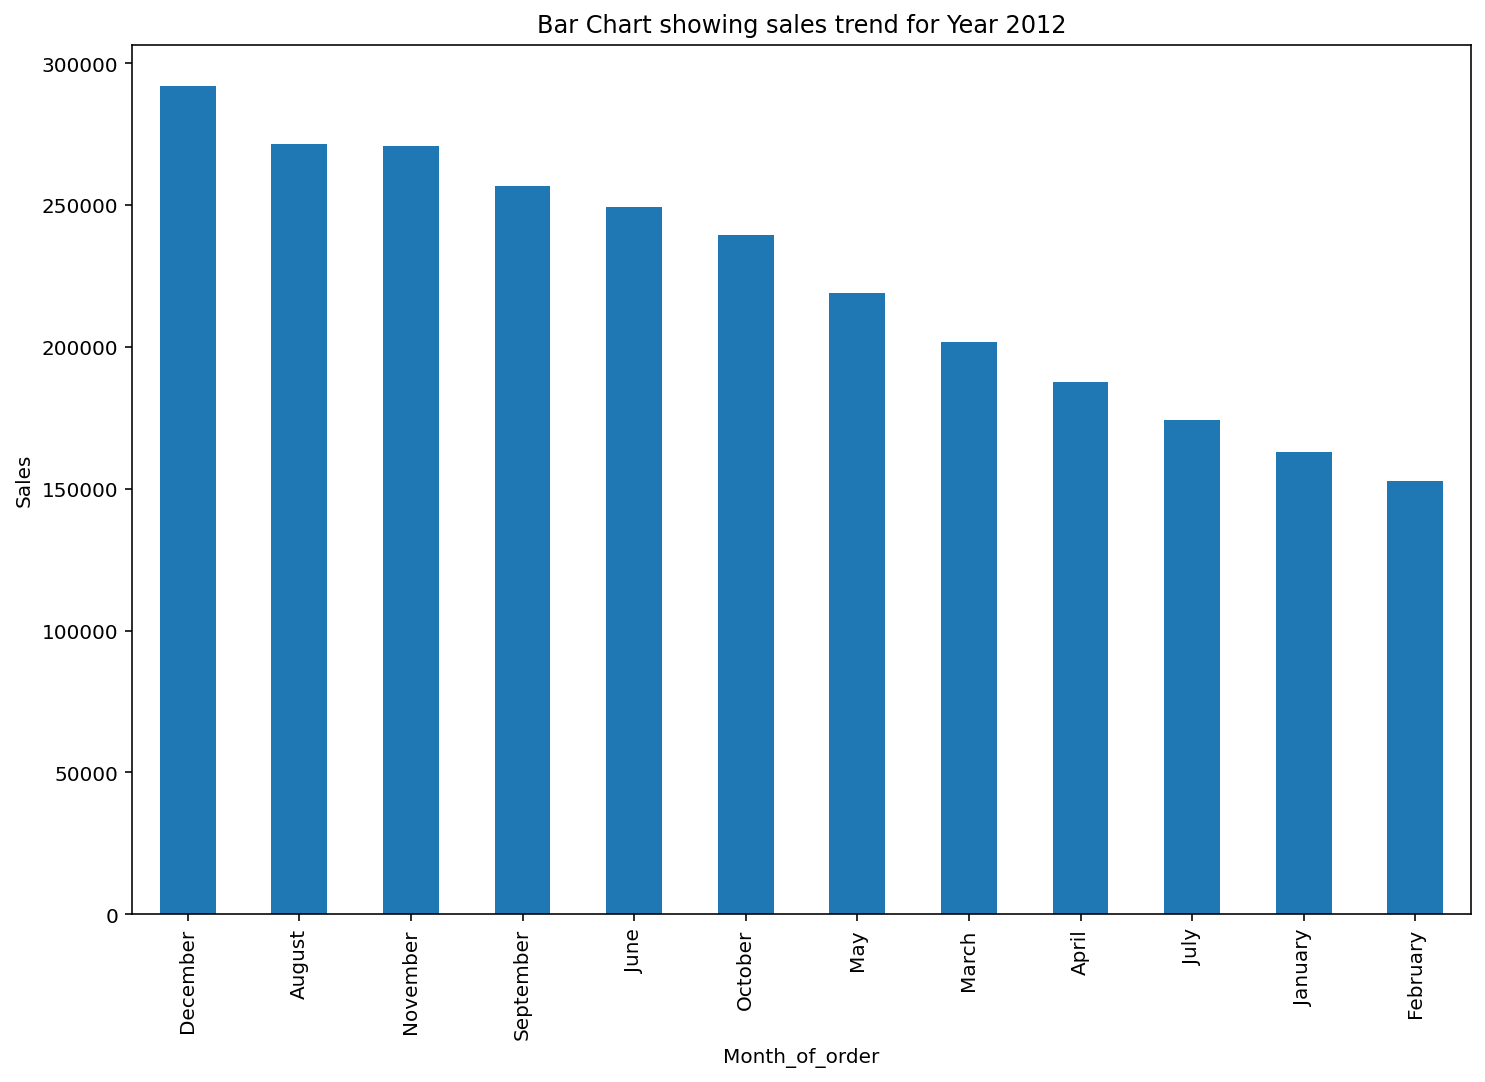

In [52]:
year_12 = data[data["Year_of_order"] == 2012]
year_12_sales = year_12.groupby('Month_of_order')["Sales"].sum().sort_values(ascending=False)
year_12_sales.plot(kind='bar', figsize=(12,8))
plt.ylabel("Sales")
plt.title("Bar Chart showing sales trend for Year 2012")
plt.show();

**`December` had the highest sales recorded in 2012**

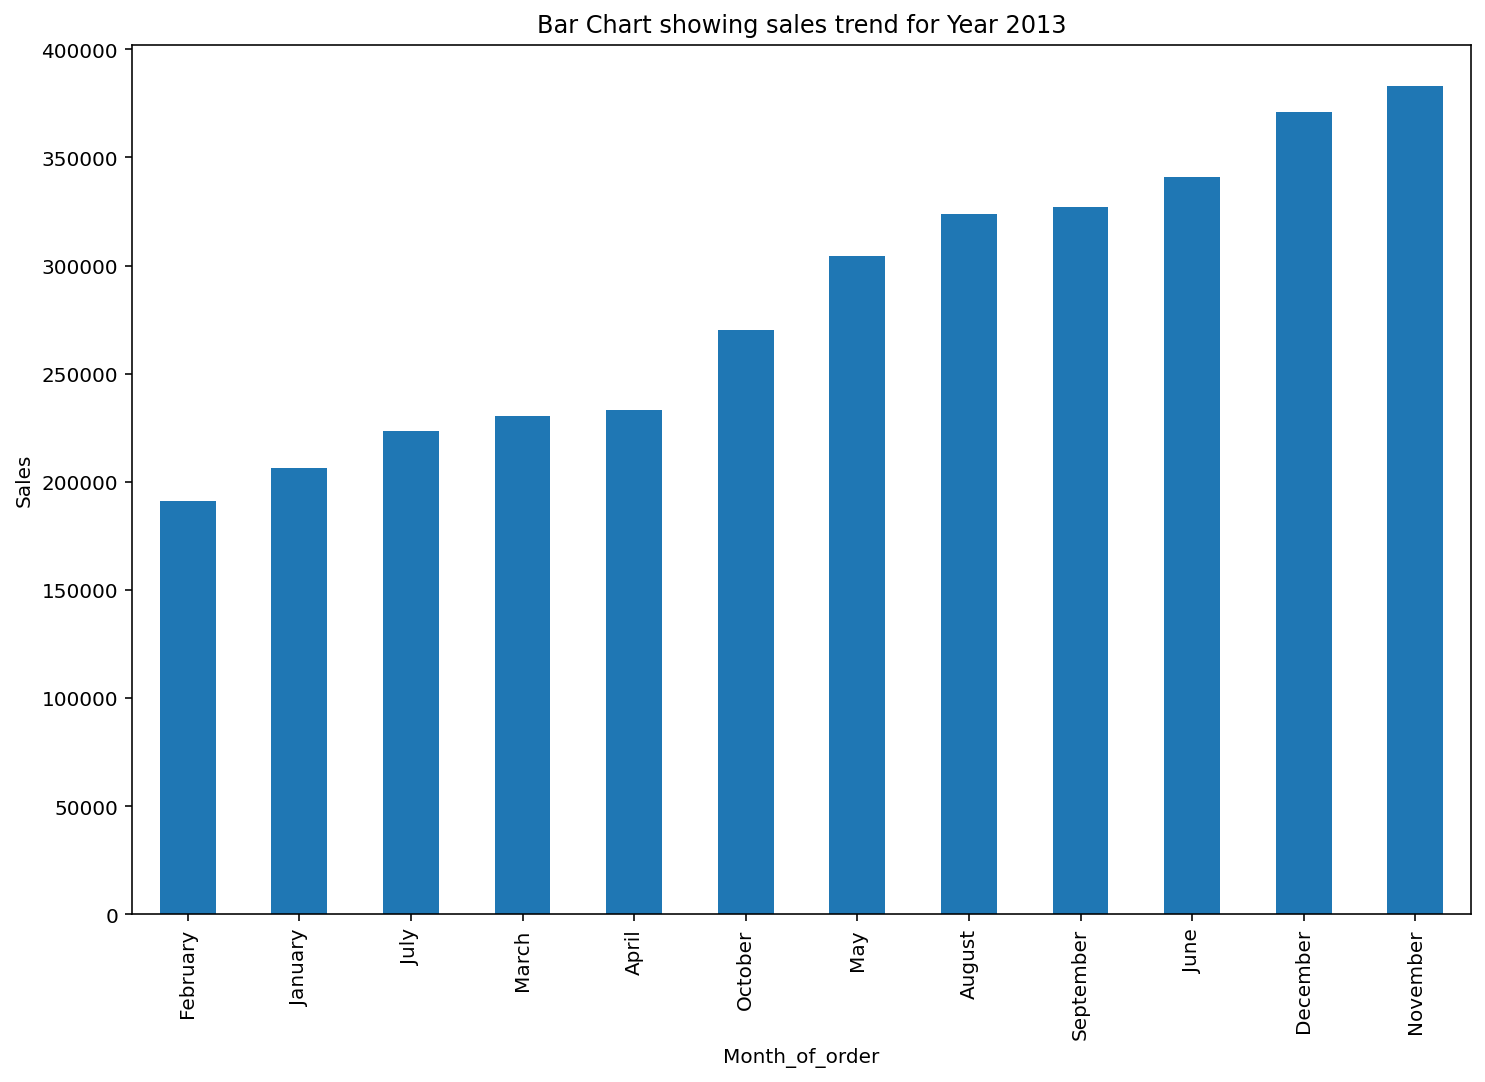

In [53]:
year_13 = data[data["Year_of_order"] == 2013]
year_13_sales = year_13.groupby('Month_of_order')["Sales"].sum().sort_values(ascending=True)
year_13_sales.plot(kind='bar', figsize=(12,8))
plt.ylabel("Sales")
plt.title("Bar Chart showing sales trend for Year 2013")
plt.show();

**`November` and `December` had the highest sales recorded in 2013**

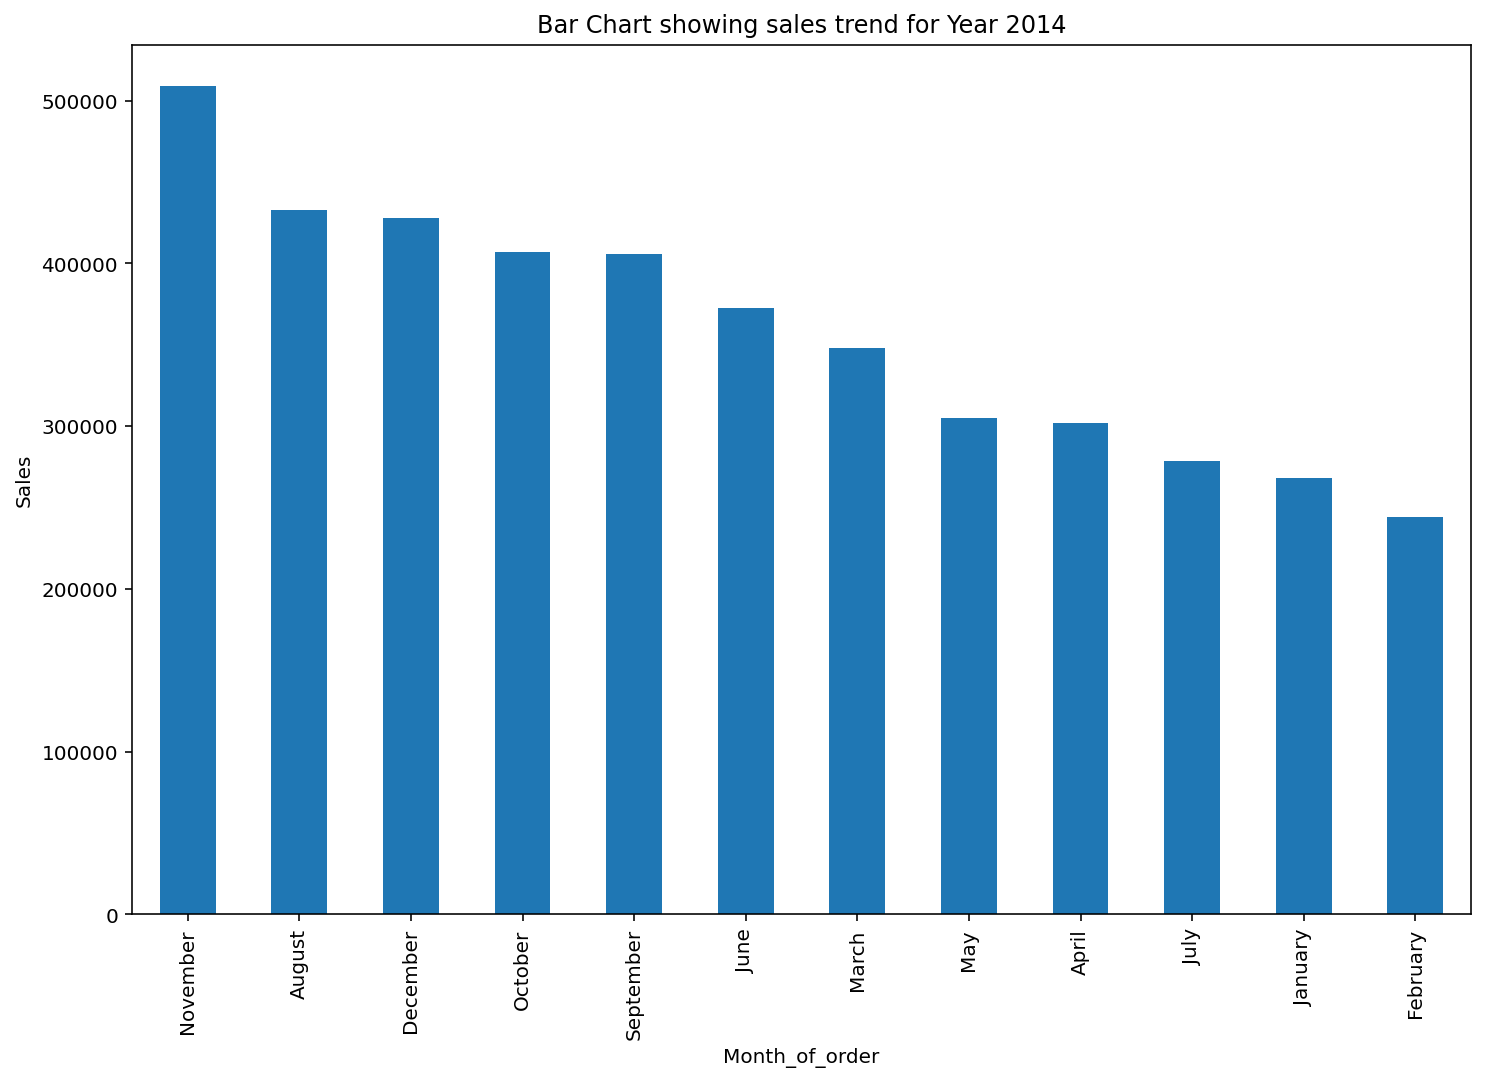

In [54]:
year_14 = data[data["Year_of_order"] == 2014]
year_14_sales = year_14.groupby('Month_of_order')["Sales"].sum().sort_values(ascending=False)
year_14_sales.plot(kind='bar', figsize=(12,8))
plt.ylabel("Sales")
plt.title("Bar Chart showing sales trend for Year 2014")
plt.show();

**`November` had the highest sales recorded in 2014**

### Trend of Profit for each year

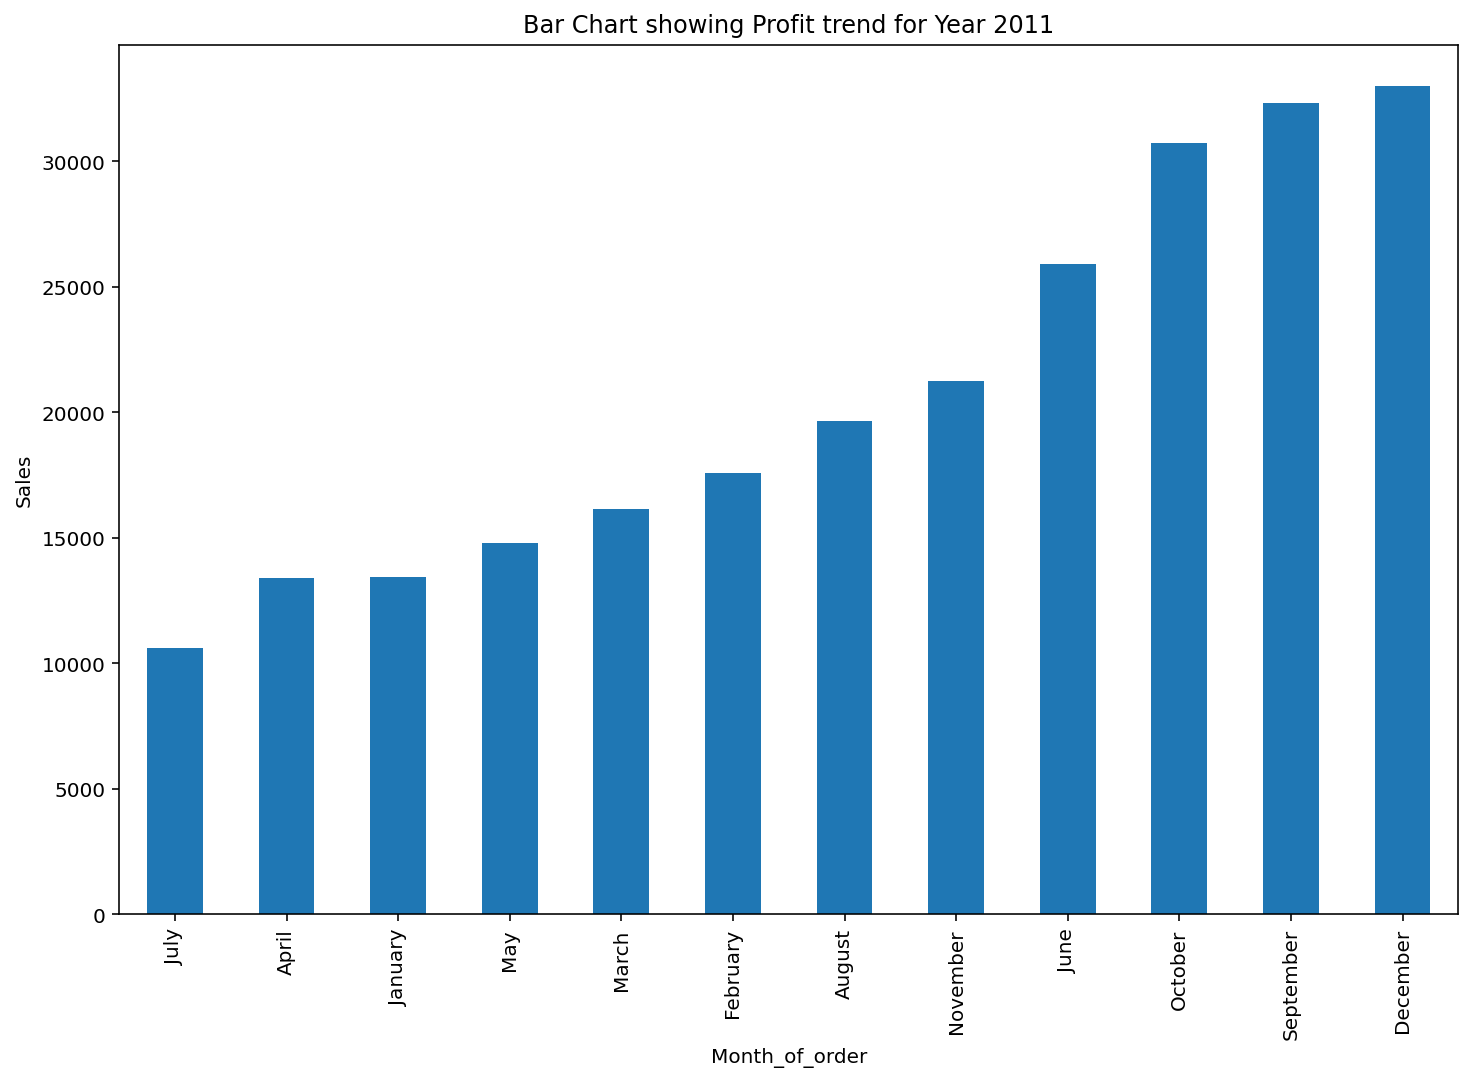

In [55]:
year_11 = data[data["Year_of_order"] == 2011]
year_11_sales = year_11.groupby('Month_of_order')["Profit"].sum().sort_values(ascending=True)
year_11_sales.plot(kind='bar', figsize=(12,8))
plt.ylabel("Sales")
plt.title("Bar Chart showing Profit trend for Year 2011")
plt.show();

**`December` and `September` had the highest profit recorded in 2011**

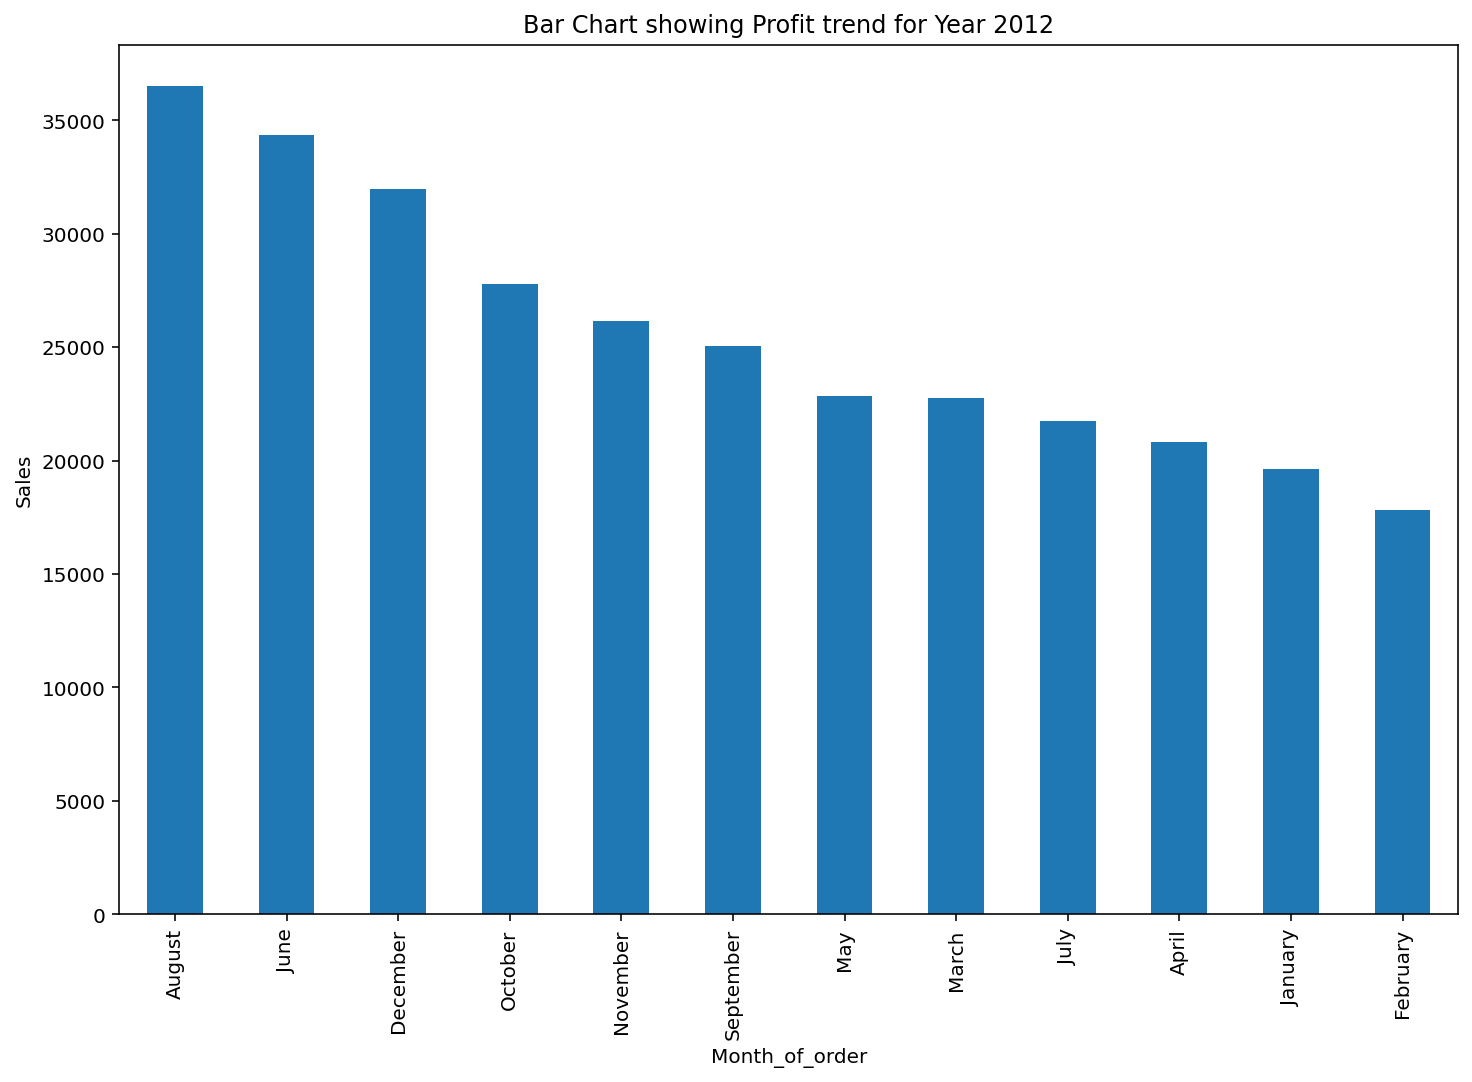

In [56]:
year_12 = data[data["Year_of_order"] == 2012]
year_12_sales = year_12.groupby('Month_of_order')["Profit"].sum().sort_values(ascending=False)
year_12_sales.plot(kind='bar', figsize=(12,8))
plt.ylabel("Sales")
plt.title("Bar Chart showing Profit trend for Year 2012")
plt.show();

**`August` had the highest sales recorded in 2012**

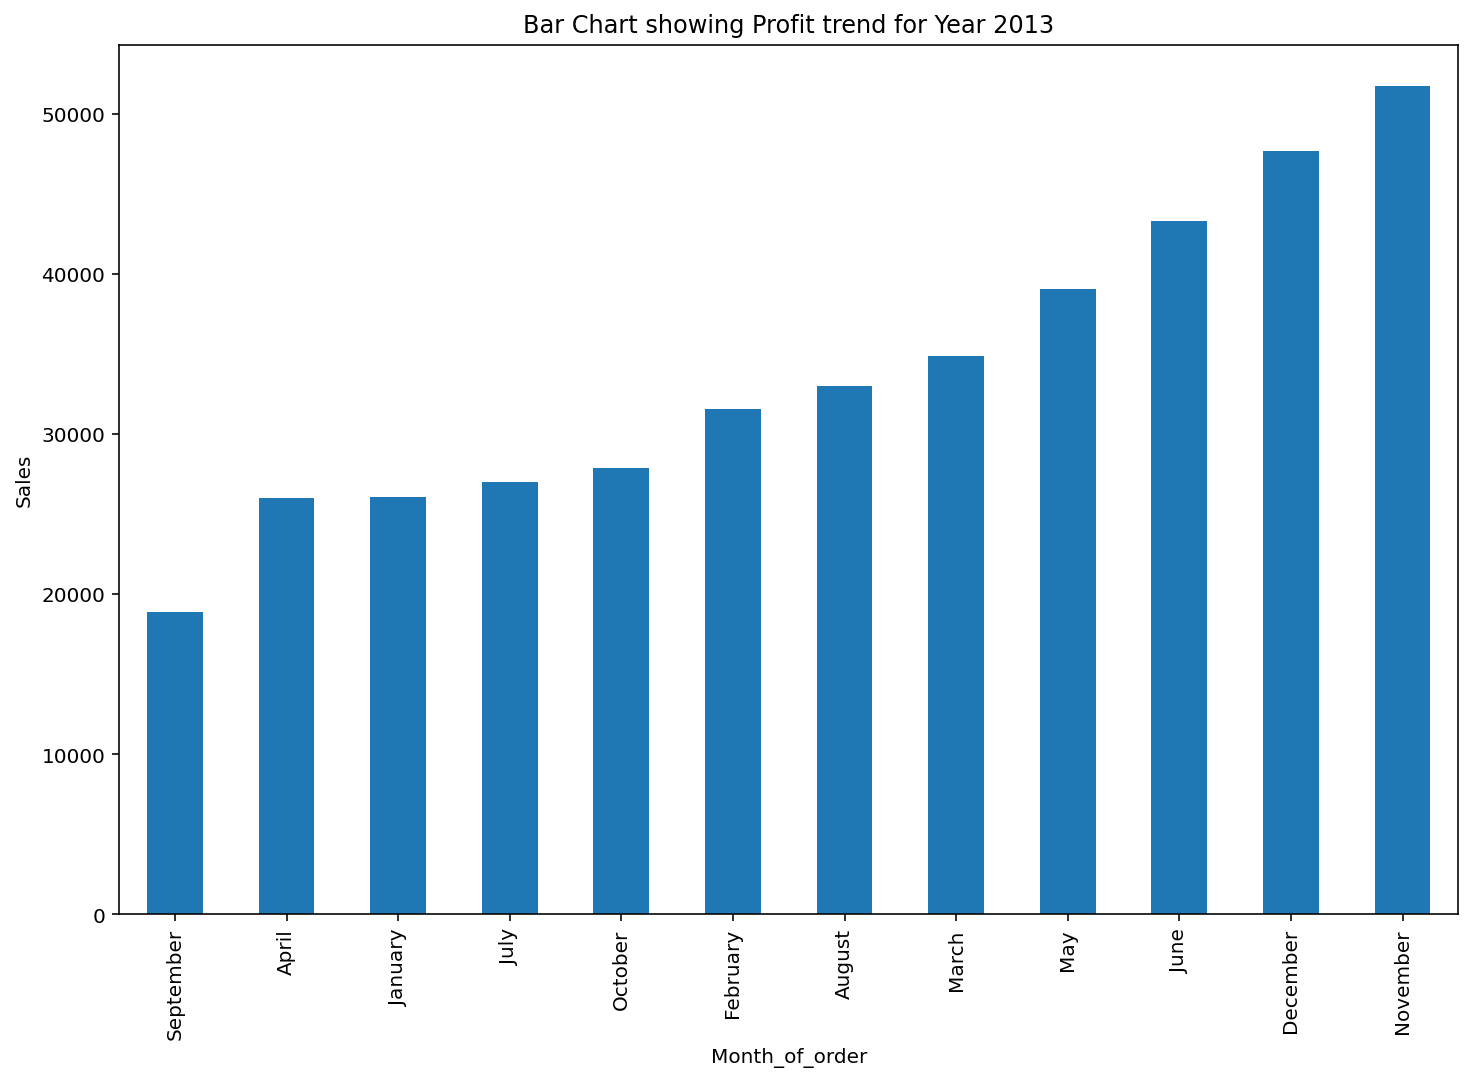

In [57]:
year_13 = data[data["Year_of_order"] == 2013]
year_13_sales = year_13.groupby('Month_of_order')["Profit"].sum().sort_values(ascending=True)
year_13_sales.plot(kind='bar', figsize=(12,8))
plt.ylabel("Sales")
plt.title("Bar Chart showing Profit trend for Year 2013")
plt.show();

**`November` had the highest Profit recorded in 2013**

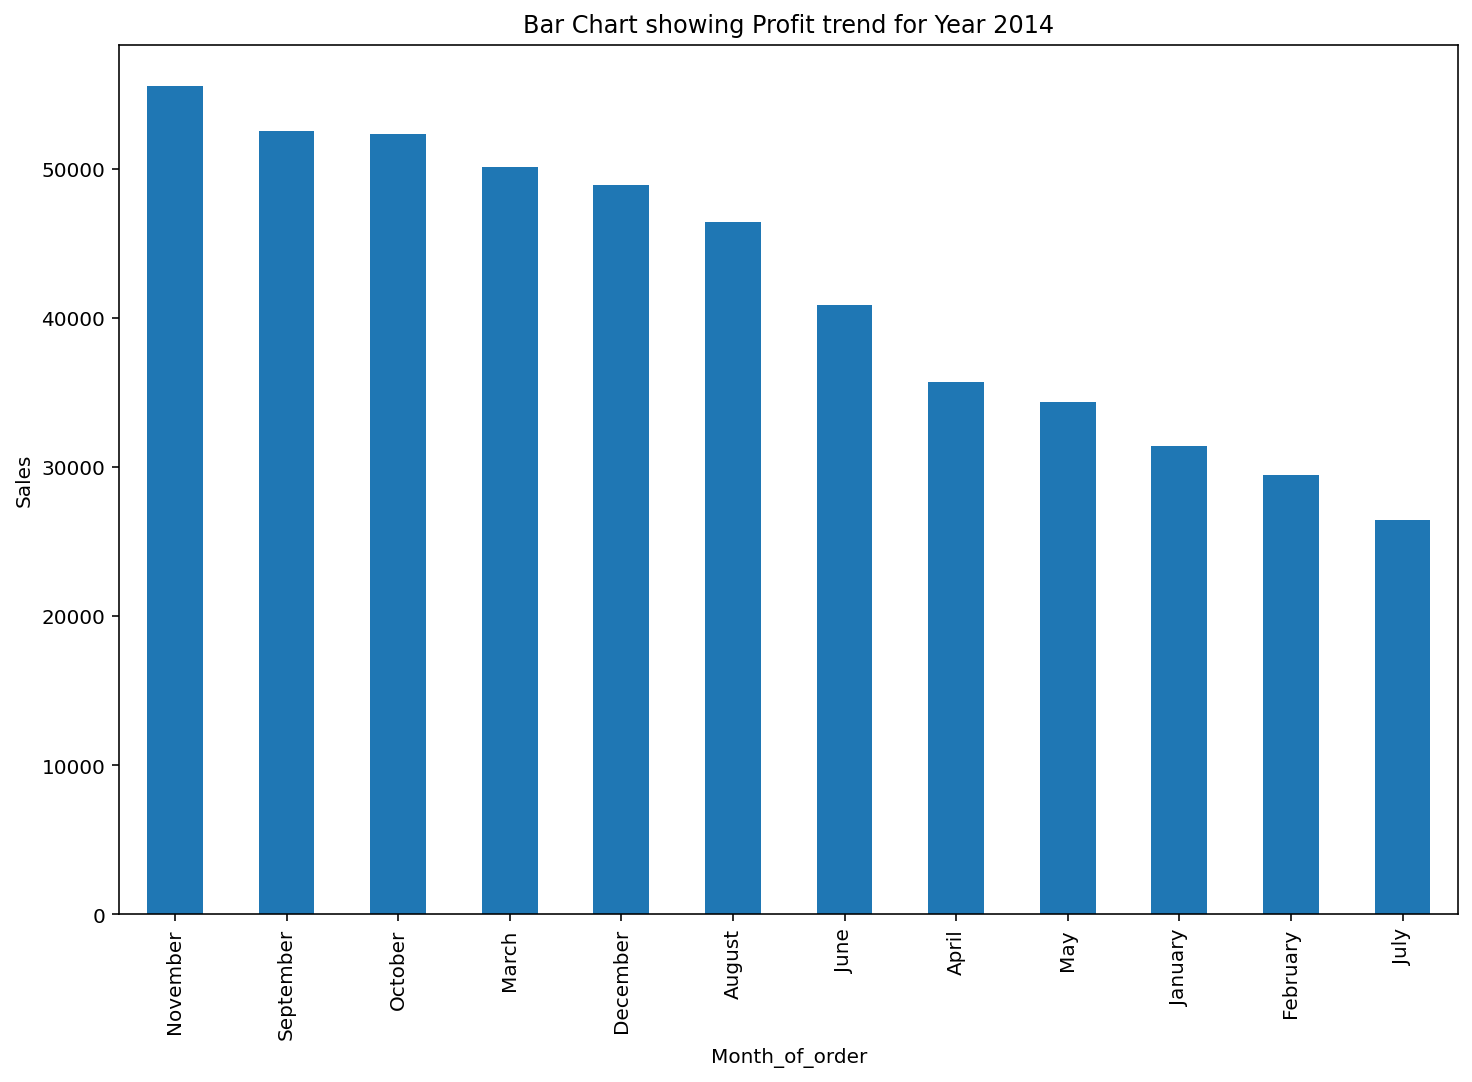

In [58]:
year_14 = data[data["Year_of_order"] == 2014]
year_14_sales = year_14.groupby('Month_of_order')["Profit"].sum().sort_values(ascending=False)
year_14_sales.plot(kind='bar', figsize=(12,8))
plt.ylabel("Sales")
plt.title("Bar Chart showing Profit trend for Year 2014")
plt.show();

**`November` had the highest profit recorded in 2014**

### General trend of sales from 2011 - 2014

In [59]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Unit_price',
       'Year_of_order', 'Month_of_order', 'Date_interval'],
      dtype='object')

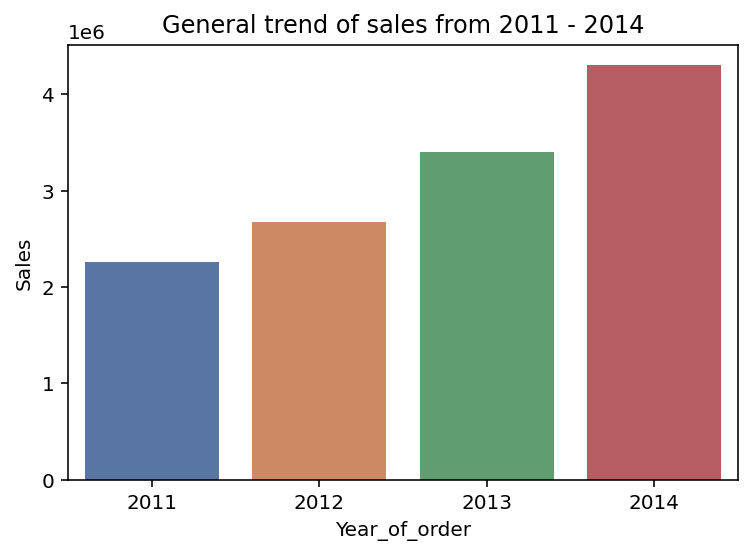

In [63]:
year_trend = data.groupby("Year_of_order")["Sales"].sum().reset_index().sort_values(by=["Sales"])

ax = sns.barplot(x="Year_of_order", y="Sales", data=year_trend, palette="deep")
plt.title("General trend of sales from 2011 - 2014")
plt.ylabel("Sales")
plt.savefig("SalesTrend.png")
plt.show();

**There have been an `increase` in sales over the years**

### The relationship between discount and sales

In [61]:
corr = data["Discount"].corr(data["Sales"])

print("Correlation between Discount and Sales is {}".format(round(corr, 2)))

Correlation between Discount and Sales is -0.09


### Are there any outliers in the sales?

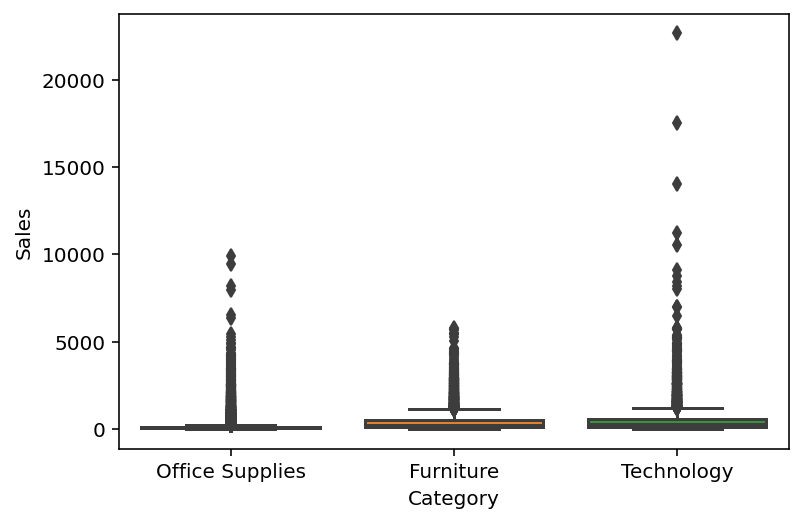

In [62]:
#Boxplot of Category with respect to Sales 

sns.boxplot(x = 'Category', y = 'Sales', data = data);


**Author: Zion Oladiran**